In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

# Set options to display all columns and expand column width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Set options to display a specific number of columns and control column width
pd.set_option('display.max_columns', 10)  # Set the maximum number of columns to display
pd.set_option('display.max_colwidth', 100)  # Set the maximum column width for text data


In [3]:

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)
# Set the style of the plot for publication
#sns.set(style="white", context="talk")  # 'talk' context increases font sizes


In [4]:
pip list

Package                   Version
------------------------- ------------
absl-py                   2.0.0
aiohttp                   3.8.5
aiosignal                 1.3.1
anndata                   0.9.2
annotated-types           0.5.0
anyio                     3.7.1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.4.0
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
backoff                   2.2.1
beautifulsoup4            4.12.2
bleach                    6.0.0
blessed                   1.20.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
chex                      0.1.7
click                     8.1.7
cloudpickle               2.2.1
cmake                     3.27.5
comm                      0.1.4
contextlib2               21.6.0
contourpy         

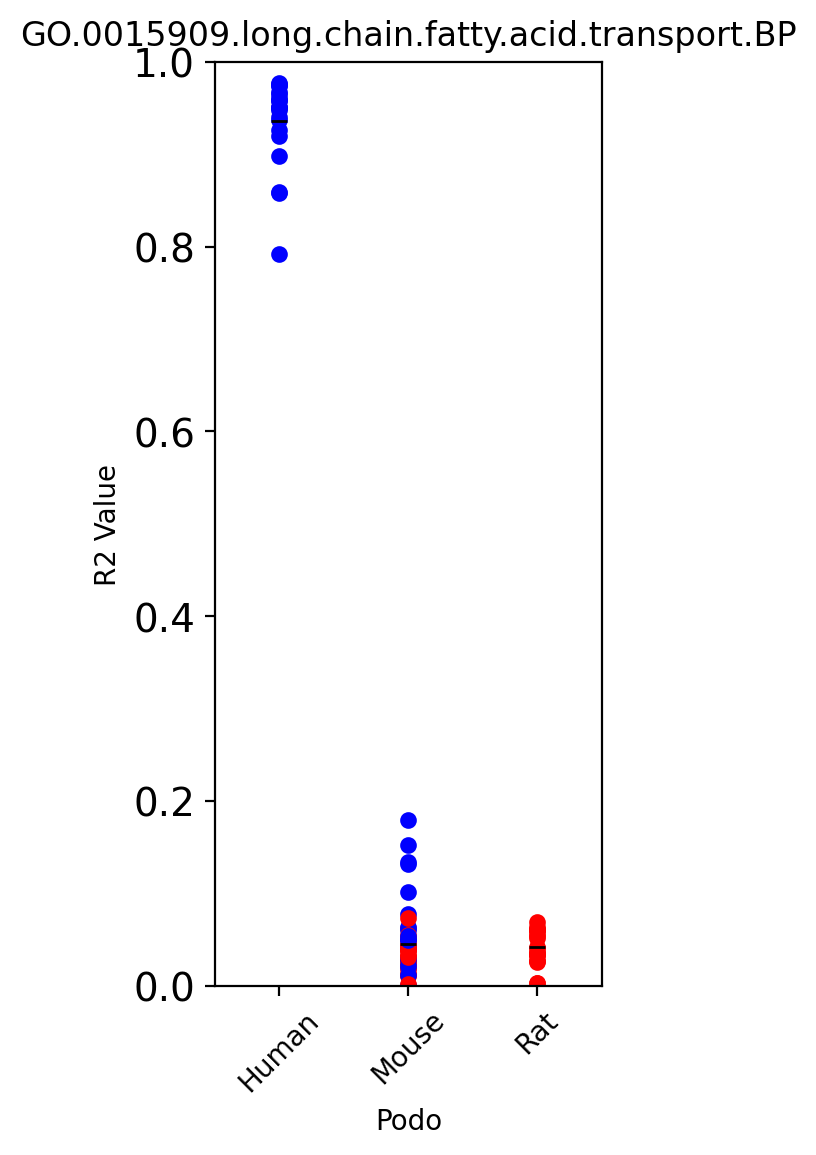

In [ ]:
# Define the path to the R2 file for the specific cell type and gene set
#r2_base_path = "/home/kloetzer/Atlas/scSpectra/species_healthy_disease/"
cell_type = "Podo"  # Replace with your desired cell type
target_gene_set = "GO.0015909.long.chain.fatty.acid.transport.BP"  # Replace with your desired gene set name

metadat = metadata

# Load the R2 file
r2_file_path = f"{r2_base_path}/R2/R2_{cell_type}.csv"
pval_file_path = f"{r2_base_path}/Pval/Pval_{cell_type}.csv"
r2_df = pd.read_csv(r2_file_path, index_col=0)
pval_df = pd.read_csv(pval_file_path, index_col=0)

# Define the sample groups (time points)

#group0 = metadata[(metadata["proj"]=="m_humphreys_DKD") & (metadata["treated"]=="Control_diseased")].orig_ident.unique().tolist()
group0 = metadata[(metadata['disease']=="diseased") & (metadata['species']=="human")].orig_ident.unique().tolist()

#group1 = metadata[(metadata["proj"]=="m_humphreys_DKD") & (metadata["treated"]=="SLGT2i")].orig_ident.unique().tolist()
group1 = metadata[(metadata['disease']=="diseased") & (metadata['species']=="mouse")].orig_ident.unique().tolist()

group2 = metadata[(metadata['disease']=="diseased") & (metadata['species']=="rat")].orig_ident.unique().tolist()


samples_to_remove = []
samples_to_remove = ['31-10006', '32-2', 'HK2558', 'HK2886', 'HK2596', 'IRI2d2b2', 'IRI14d1b2', 'RK7.1', 'RK4.1', 'RK11.2.New', 'RK5.1.Old.MO']  # Replace with the names of samples you want to remove
  # Replace with the names of samples you want to remove

# Creating the list with samples to be removed
group0 = [sample for sample in group0 if sample not in samples_to_remove]

group1 = [sample for sample in group1 if sample not in samples_to_remove]

group2 = [sample for sample in group2 if sample not in samples_to_remove]

# Identify significant samples based on Pval < 0.05 for the specific gene set
significant_samples = pval_df.index[pval_df[target_gene_set] < 0.01]


# Assuming the rest of your setup code (loading data, etc.) is here

# Define x-coordinates for the groups, closer together
group_positions = [0.4, 0.6, 0.8]  # Adjust these values as needed

# Create a figure for the plot
plt.figure(figsize=(2.5, 6))

# Initialize lists to store mean R2 values for each group
mean_r2_values = []

# Plot each individual sample at the new group positions
for i, group in enumerate([group0, group1, group2]):
    group_r2_values = r2_df.loc[group, target_gene_set]
    mean_r2 = group_r2_values.mean()
    mean_r2_values.append(mean_r2)

    for sample in group:
        x_position = group_positions[i]  # x-coordinate for this group
        color = 'red' if sample in significant_samples else 'blue'
        plt.plot(x_position, group_r2_values.loc[sample], marker='o', markersize=5, color=color)

# Plot the mean R2 values
plt.plot(group_positions, mean_r2_values, marker='_', color='black', linestyle='', label='Mean R2')

# Customize the plot
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xlim(0.3, 0.9)  # Set the x-axis range
plt.xlabel(cell_type)
plt.ylabel("R2 Value")
plt.title(target_gene_set)
plt.xticks(group_positions, ["Human", "Mouse", "Rat"], rotation = 45)  # Set custom x-axis ticks
plt.yticks(fontsize=14)
#plt.legend()
plt.grid(False)
plt.show()

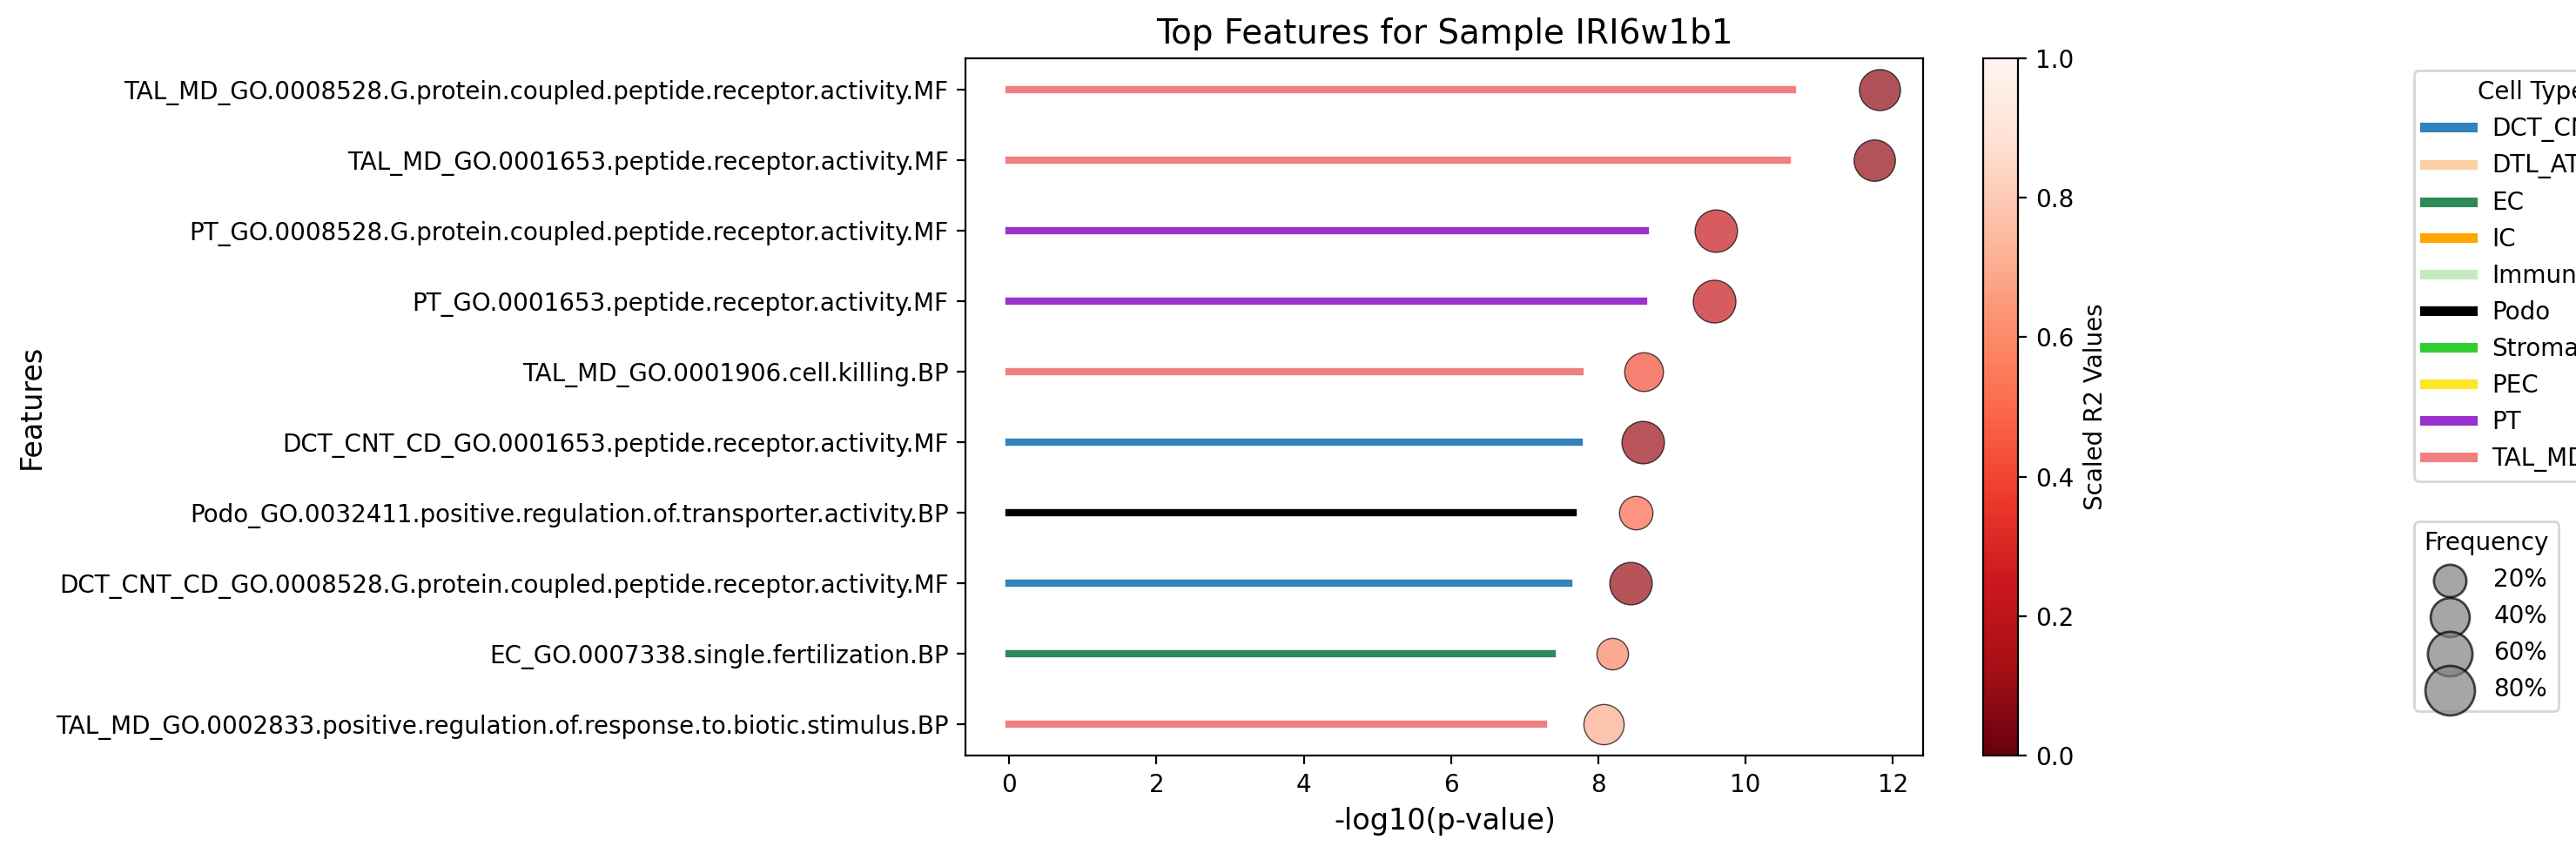

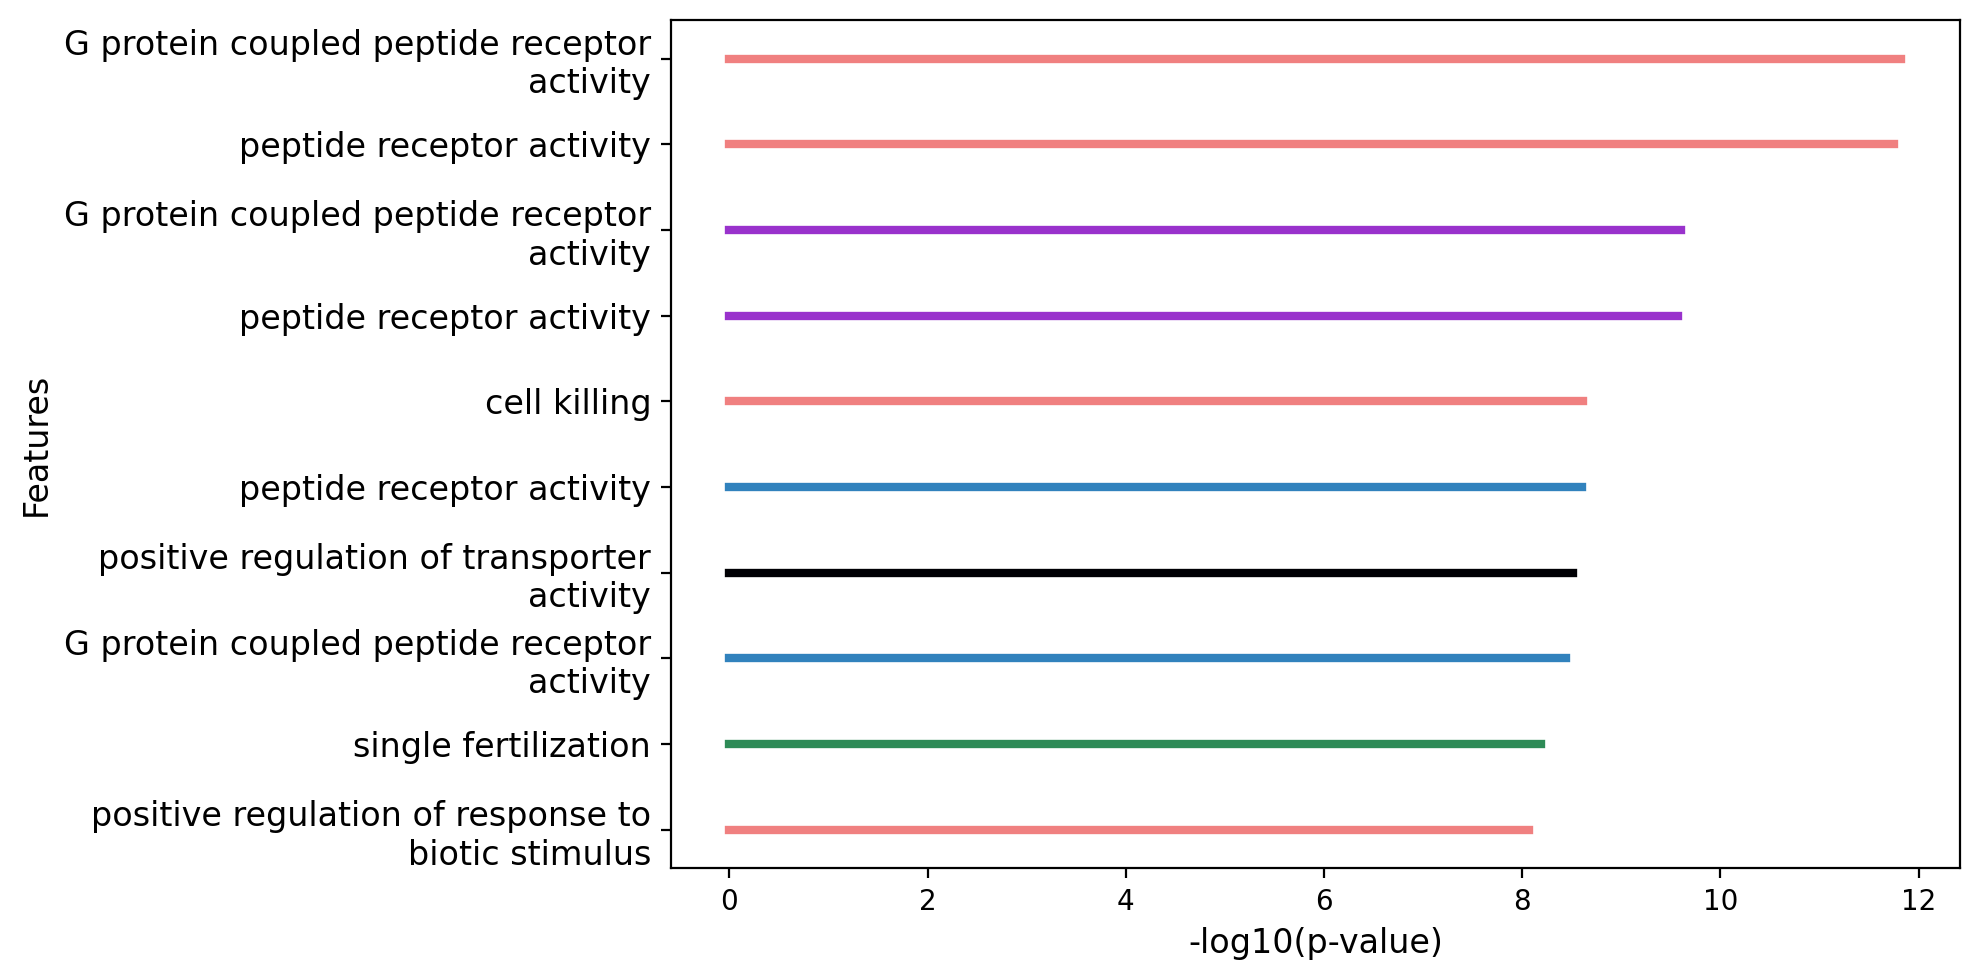

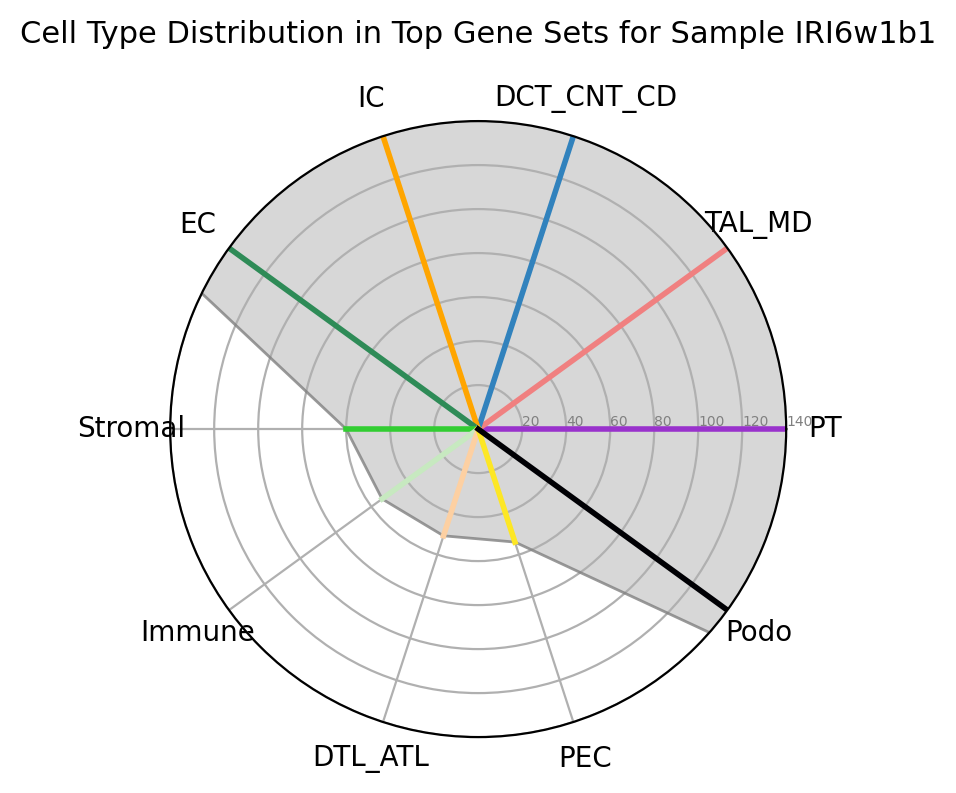

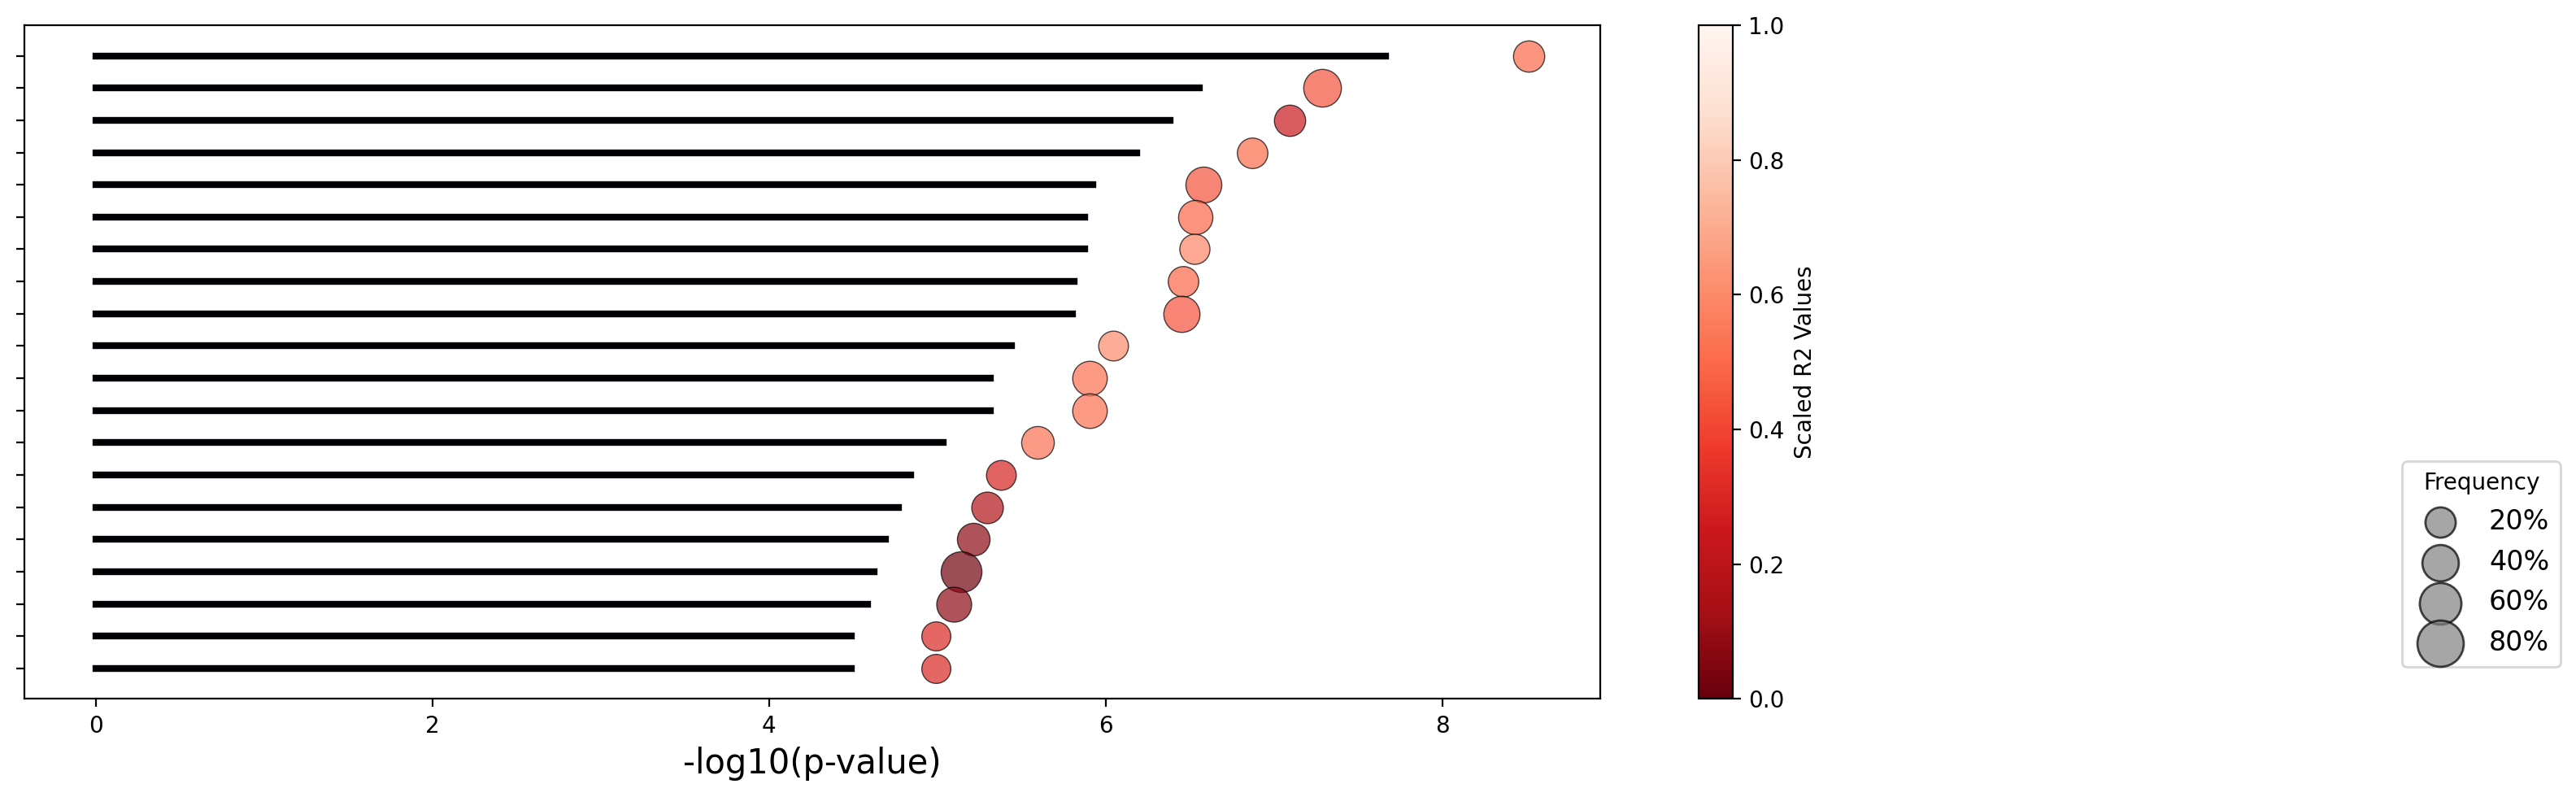

In [ ]:
sample_of_interest = 'IRI6w1b1'

#max_value = 300

ct_plot1 = "Podo"

import re

import re

def auto_split_label(label, max_length=40):

    extracted_name = re.search(r'.*?_GO\.\d{7}\.(.*?)\.[A-Z]{2}$', label)
    if extracted_name:
        # Replace dots with spaces and split into words
        words = extracted_name.group(1).replace('.', ' ').split()
    else:
        # If no match, return an empty string or some placeholder
        return ""

    # Start with the first word and check length as adding more words
    split_label = words[0]
    current_length = len(words[0])

    # Add each word to the line until the max_length is reached, then start a new line
    for word in words[1:]:
        if current_length + len(word) + 1 <= max_length:
            split_label += ' ' + word
            current_length += len(word) + 1
        else:
            split_label += '\n' + word
            current_length = len(word)

    return split_label


# Provided cell types and colors
cell_colors = {
    "DCT_CNT_CD": "#3182bd",
    "DTL_ATL": "#fdd0a2",
    "EC": "seagreen",
    "IC": "orange",
    "Immune": "#c7e9c0",
    "Podo": "#000004",
    "Stromal": "limegreen",
    "PEC": "#fde725",
    "PT": "darkorchid",
    "TAL_MD": "lightcoral",
}

# Function to extract cell type from feature name
def extract_cell_type(feature_name):
    for cell_type in cell_colors.keys():
        if feature_name.startswith(cell_type):
            return cell_type
    return "Unknown"

# Sample data - replace with your actual data

top_20_features = combined_pval.loc[sample_of_interest].nsmallest(10)
neg_log_pvals = -np.log10(top_20_features)
r2_values = combined_r2.loc[sample_of_interest][top_20_features.index]

# Create a reversed red colormap for R2 values
cmap = plt.cm.Reds_r  # '_r' suffix to reverse the colormap

norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalization fixed from 0 to 1

# Assuming 'significant_counts_df' is your DataFrame and it has a 'GeneSet' and 'NormalizedPercentage' column
scale_factor = 4
base_size = 100
#base_size = 20

# Map features to their normalized percentage
feature_to_percentage = dict(zip(significant_counts_df['GeneSet'], significant_counts_df['NormalizedPercentage']))

# Create the dot plot
fig, ax = plt.subplots(figsize=(16, 5))
for i, (feature, neg_log_pval) in enumerate(neg_log_pvals.items()):
    cell_type = extract_cell_type(feature)
    bar_color = cell_colors.get(cell_type, 'grey')
    dot_color = cmap(norm(r2_values[feature]))
    
    # Get the normalized percentage for the dot size
    normalized_percentage = feature_to_percentage.get(feature, 0)
    dot_size = normalized_percentage * scale_factor + base_size

    ax.plot([0, neg_log_pval - (neg_log_pval / 10)], [i, i], color=bar_color, linewidth=3)
    ax.scatter(neg_log_pval, i, s=dot_size, color=dot_color, edgecolor='black', alpha=0.7, linewidth=0.5)

ax.set_yticks(range(len(top_20_features.index)))
ax.set_yticklabels(top_20_features.index, fontsize=10)
ax.set_xlabel('-log10(p-value)', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title(f'Top Features for Sample {sample_of_interest}', fontsize=14)

# Invert y-axis to have the most significant features at the top
ax.invert_yaxis()

# Create a colorbar for the R2 values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Scaled R2 Values', orientation='vertical')

# Legend for cell types
cell_legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=cell_type) for cell_type, color in cell_colors.items()]
legend1 = ax.legend(handles=cell_legend_elements, title='Cell Types', bbox_to_anchor=(1.5, 1), loc='upper left')

# Example normalized percentages for the dot size legend
example_percentages = [20, 40, 60, 80]
legend_dot_sizes = [p * scale_factor + base_size for p in example_percentages]

# Add legend for dot sizes
for p, size in zip(example_percentages, legend_dot_sizes):
    ax.scatter([], [], s=size, color='gray', edgecolor='black', alpha=0.7, label=f'{p}%')

legend2 = ax.legend(title='Frequency', bbox_to_anchor=(1.5, 0.2), loc='center left')
ax.add_artist(legend1)  # Add back the first legend

plt.tight_layout()
plt.show()









# Create the dot plot
fig, ax = plt.subplots(figsize=(10, 5))
for i, (feature, neg_log_pval) in enumerate(neg_log_pvals.items()):
    cell_type = extract_cell_type(feature)
    bar_color = cell_colors.get(cell_type, 'grey')
    
    # Draw the bar for significance
    ax.plot([0, neg_log_pval], [i, i], color=bar_color, linewidth=3)


# Process each feature name through auto_split_label and set as y-tick labels
processed_labels = [auto_split_label(feat) for feat in top_20_features.index]
ax.set_yticks(range(len(top_20_features.index)))
ax.set_yticklabels(processed_labels, fontsize=12)

#ax.set_yticklabels(top_20_features.index, fontsize=20)
ax.set_xlabel('-log10(p-value)', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

# Invert y-axis to have the most significant features at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()









# Define your desired order of cell types
desired_order = [
     
"PT", 
"TAL_MD", 
"DCT_CNT_CD", 
"IC",    
"EC",
"Stromal",      
"Immune",   
"DTL_ATL",  
"PEC",           
"Podo",    

    
]  # Replace with actual cell types

#top_20_features = combined_pval.loc[sample_of_interest].nsmallest(100)

sample_features = combined_pval.loc[sample_of_interest]

top_20_features = sample_features[sample_features < p_value_threshold]

# Assume 'combined_pval' is a DataFrame you have that contains the p-values

# Select the top 50 gene sets from the top features
top_gene_sets = top_20_features.index

# Group the top gene sets by cell type
grouped_data = pd.Series(top_gene_sets).apply(extract_cell_type).value_counts()

categories = list(grouped_data.index)

# Initialize ordered values with zero for all categories
ordered_values = [grouped_data.get(ct, 0) for ct in desired_order]

# Since we need to repeat the first value to close the circular graph
ordered_values += ordered_values[:1]

# Calculate the angle of each axis in the plot
N = len(desired_order)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], desired_order)

# Draw ylabels and set plot limits
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=5)
plt.ylim(0, 140)


# Neutral color for shading
shade_color = 'lightgrey'

# Fill the entire area under the radar chart with a neutral color
ax.fill(angles, ordered_values, shade_color, alpha=0.9)

# Draw thin lines connecting the points
ax.plot(angles, ordered_values, color='grey', linewidth=1, linestyle='-', alpha=0.8)

# Plot each line segment in its respective cell type color
for idx in range(N):
    color = cell_colors.get(desired_order[idx], "grey")
    ax.plot([angles[idx], 0], [ordered_values[idx], 0], color=color, linewidth=2)

# Change the color of tick labels to red if the cell type is missing
for idx, label in enumerate(ax.get_xticklabels()):
    if desired_order[idx] not in categories:
        label.set_color('red')

# Add a title
plt.title('Cell Type Distribution in Top Gene Sets for Sample ' + sample_of_interest, size=11, y=1.1)

plt.show()


# Desired cell type for visualization
desired_cell_type = ct_plot1

# Assuming 'combined_pval' and 'combined_r2' are DataFrames with samples as rows and features as columns
# Filter for the specific sample of interest
sample_pvals = combined_pval.loc[sample_of_interest]
sample_r2 = combined_r2.loc[sample_of_interest]

# Filter the top features for the specific sample and cell type
#top_features_for_sample = sample_pvals.nsmallest(25)
filtered_features = sample_pvals[sample_pvals.index.map(extract_cell_type) == desired_cell_type].nsmallest(20)
filtered_neg_log_pvals = -np.log10(filtered_features)
filtered_r2_values = sample_r2[filtered_features.index]

# Now, update the dot plot code to use the filtered data
fig, ax = plt.subplots(figsize=(16, 5))
for i, (feature, neg_log_pval) in enumerate(filtered_neg_log_pvals.items()):
    cell_type = extract_cell_type(feature)
    bar_color = cell_colors.get(cell_type, 'grey')
    dot_color = cmap(norm(filtered_r2_values[feature]))
    
    # Get the normalized percentage for the dot size (if applicable)
    normalized_percentage = feature_to_percentage.get(feature, 0)
    dot_size = normalized_percentage * scale_factor + base_size

    ax.plot([0, neg_log_pval - (neg_log_pval / 10)], [i, i], color=bar_color, linewidth=3)
    ax.scatter(neg_log_pval, i, s=dot_size, color=dot_color, edgecolor='black', alpha=0.7, linewidth=0.5)

ax.set_yticks(range(len(filtered_features.index)))

prefix_to_remove = f"{desired_cell_type}_"
cleaned_labels = [label.replace(prefix_to_remove, '', 1) for label in filtered_features.index]

# Apply the auto-splitting to each label
cleaned_labels = [auto_split_label(label) for label in cleaned_labels]

ax.set_yticklabels(cleaned_labels, fontsize=10)
ax.set_xlabel('-log10(p-value)', fontsize=15)
#ax.set_ylabel('Features', fontsize=12)
#ax.set_title(f'Top Features for Sample {sample_of_interest} - Cell Type: {desired_cell_type}', fontsize=14)
ax.invert_yaxis()

# Create a colorbar for the R2 values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Scaled R2 Values', orientation='vertical')

# Legend for cell types
#cell_legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=cell_type) for cell_type, color in cell_colors.items()]
#legend1 = ax.legend(handles=cell_legend_elements, title='Cell Types', bbox_to_anchor=(1.5, 1), loc='upper left')

# Example normalized percentages for the dot size legend
example_percentages = [20, 40, 60, 80]
legend_dot_sizes = [p * scale_factor + base_size for p in example_percentages]

# Add legend for dot sizes
for p, size in zip(example_percentages, legend_dot_sizes):
    ax.scatter([], [], s=size, color='gray', edgecolor='black', alpha=0.7, label=f'{p}%')

legend2 = ax.legend(title='Frequency', bbox_to_anchor=(1.5, 0.2), loc='center left', fontsize='large')
#ax.add_artist(legend1)  # Add back the first legend

plt.tight_layout()
plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

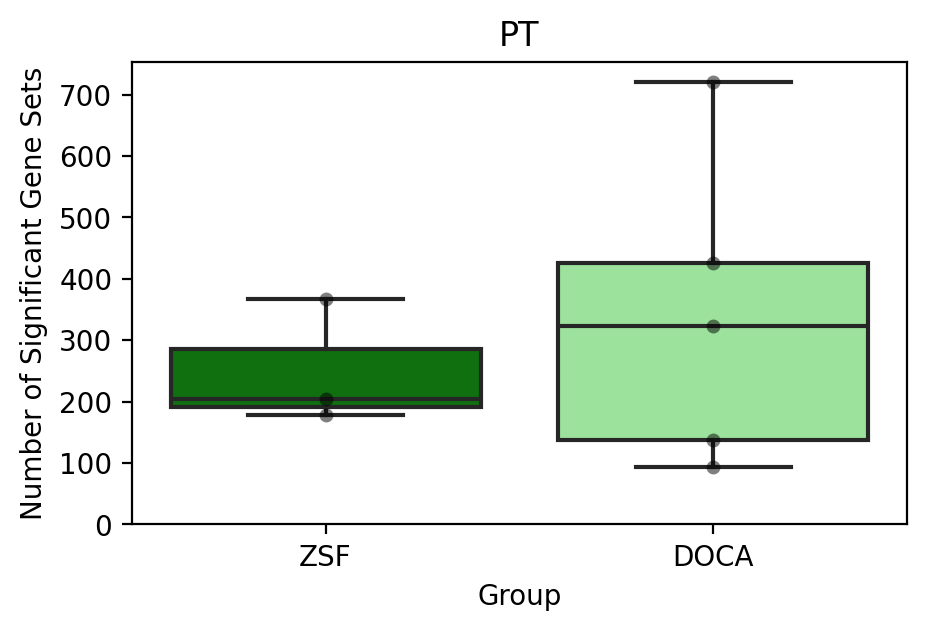

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

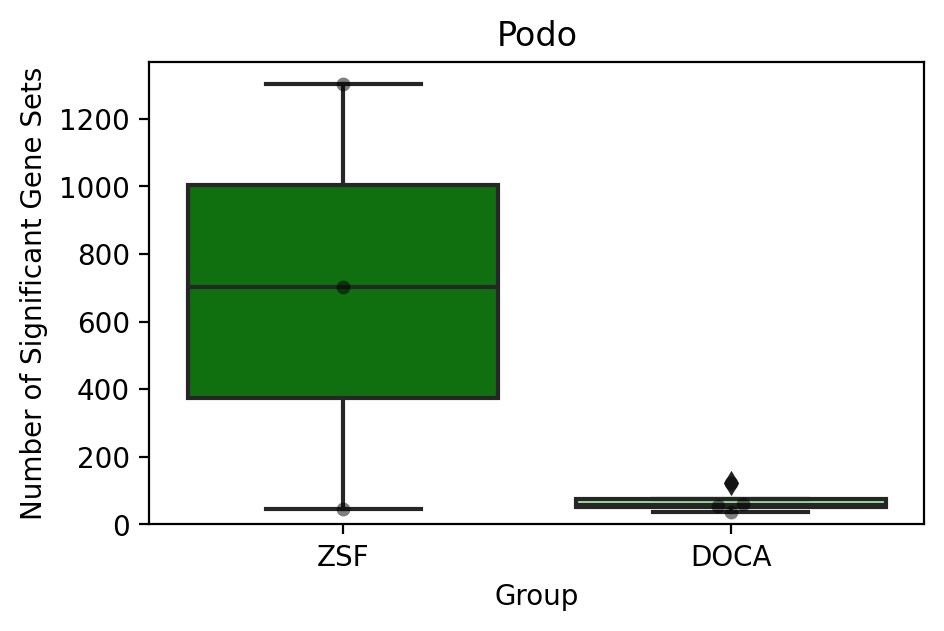

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

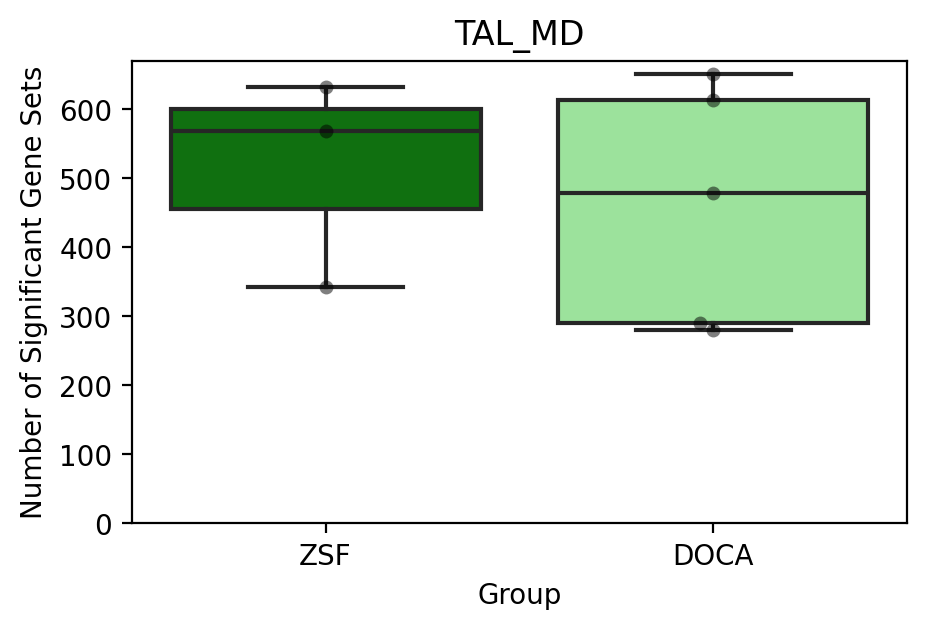

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

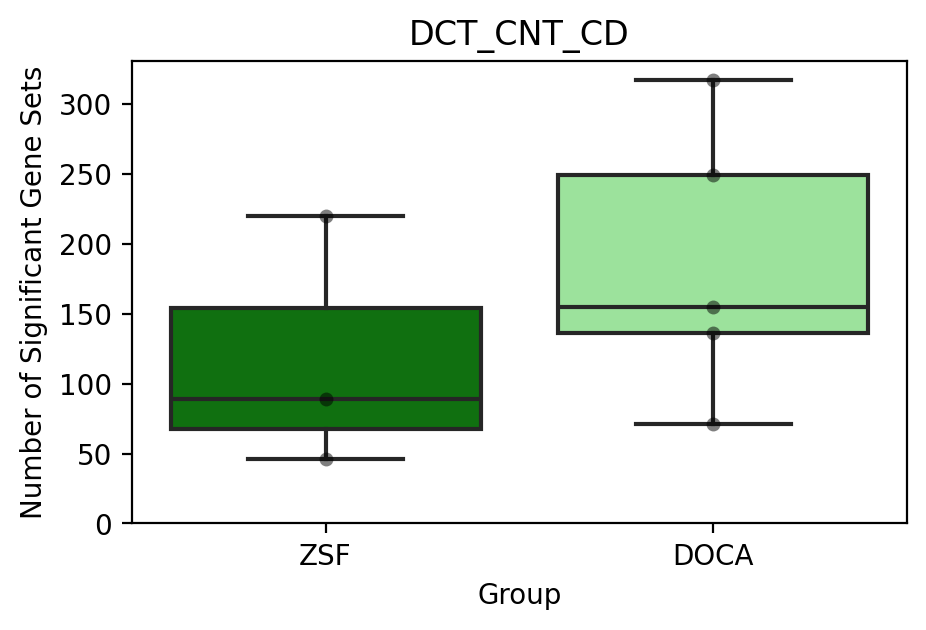

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

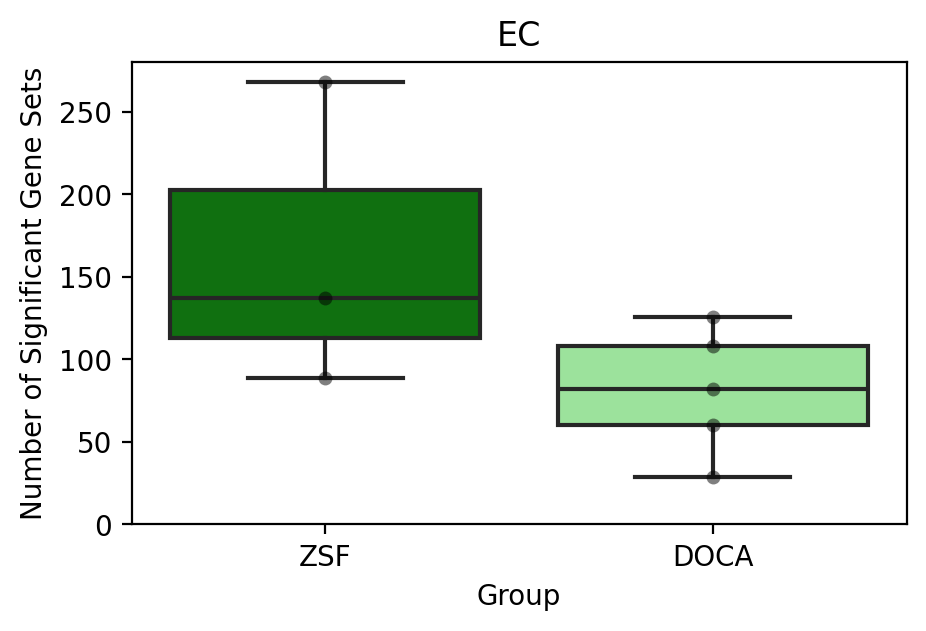

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

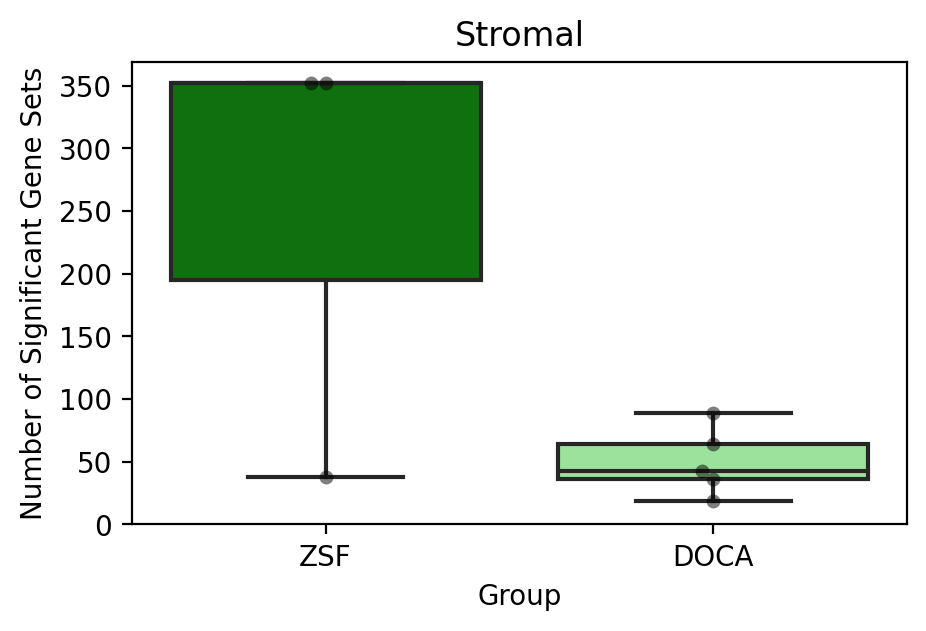

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

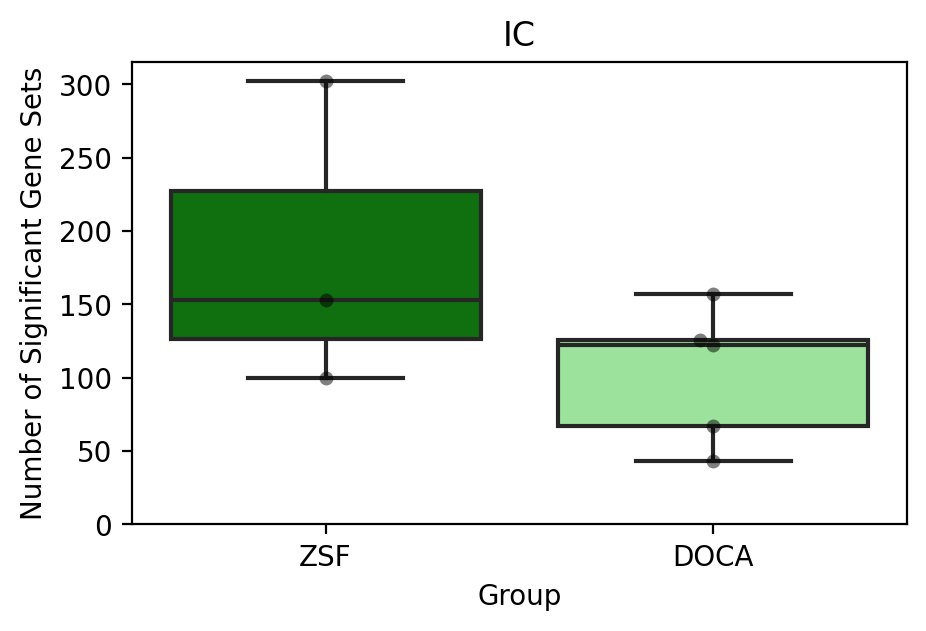

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

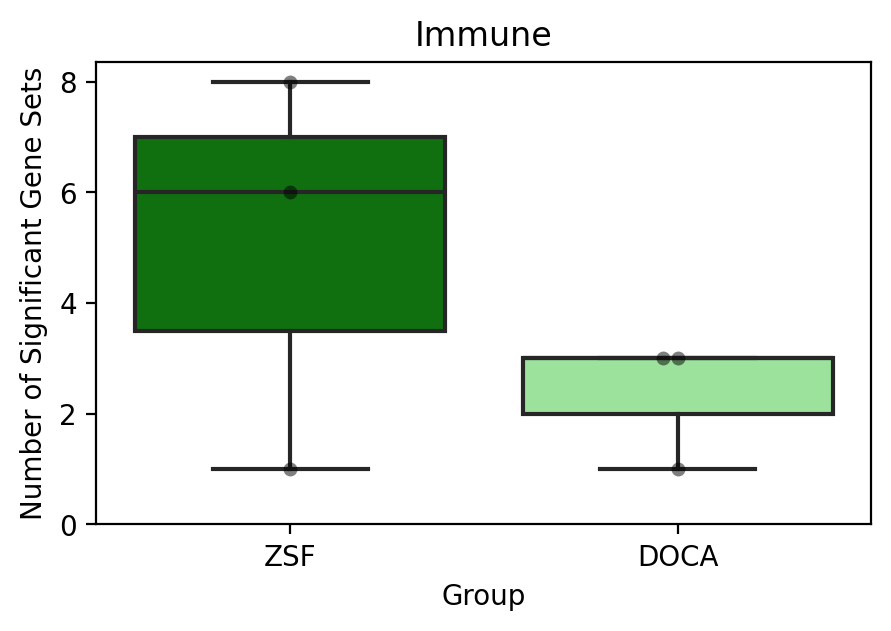

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

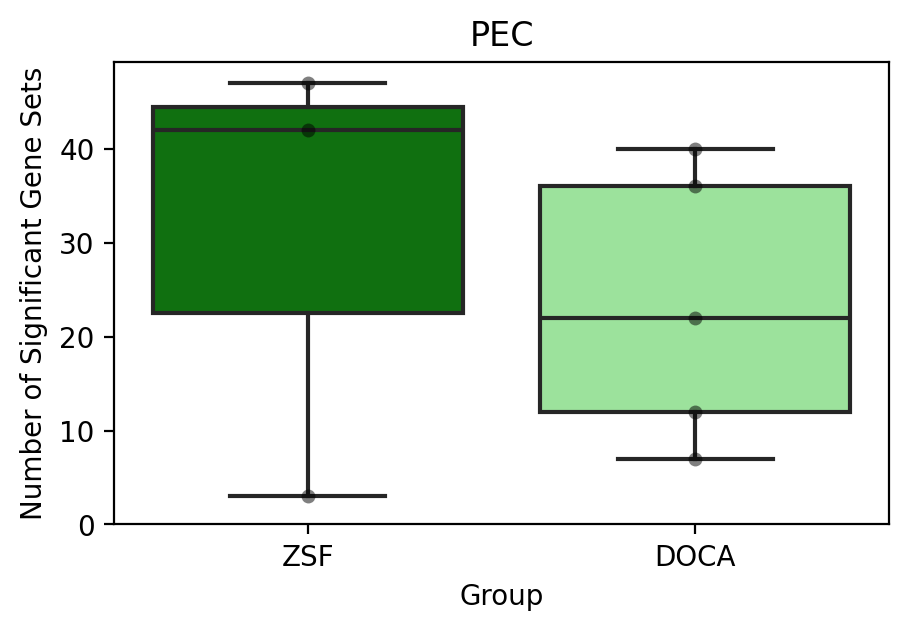

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

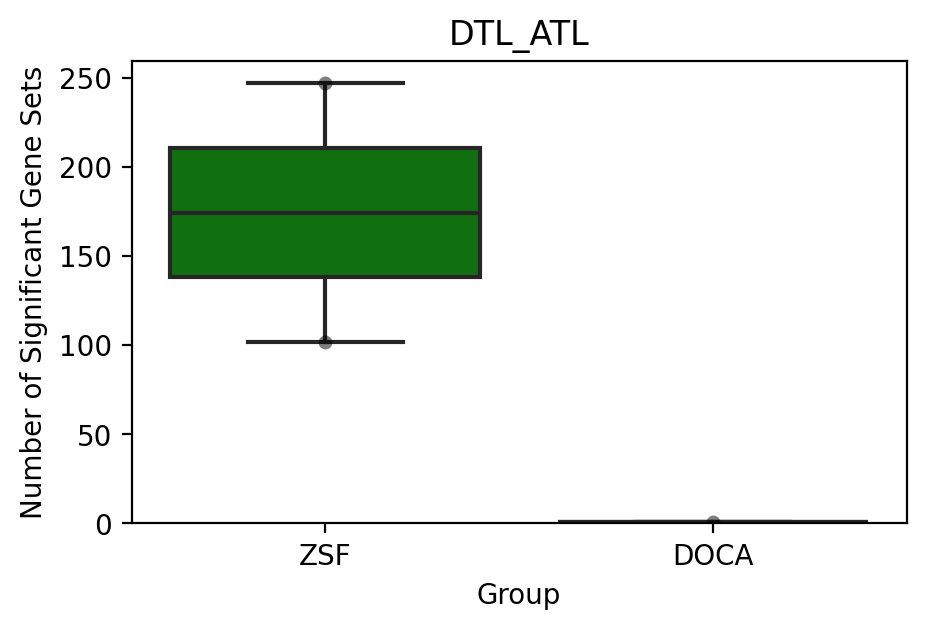

In [ ]:
# Sample groups
group1 = metadata[(metadata["treated"] == "Control_diseased") & (metadata["proj"] == "r_ZSF")].orig_ident.unique().tolist()

group2 = metadata[(metadata["treated"] == "Control_diseased") & (metadata["proj"] == "r_doca")].orig_ident.unique().tolist()




color_list = ['green', 'lightgreen']

groups = {'ZSF': group1, 'DOCA': group2}

for cell_type_of_interest in cell_types:
    p_value_threshold = 0.01

    # Prepare DataFrame to hold counts
    counts_df = pd.DataFrame(columns=['Group', 'Count'])

    # Loop through each group and each sample within the group
    for group_name, samples in groups.items():
        for sample in samples:
            # Filter for cell type of interest and significant p-values
            sample_features = combined_pval.loc[sample]
            significant_features = sample_features[sample_features < p_value_threshold]
            top_gene_sets = significant_features.index

            # Count gene sets for the specific cell type
            count = pd.Series(top_gene_sets).apply(lambda x: x.startswith(cell_type_of_interest)).sum()

            # Append count to the DataFrame only if count is greater than zero
            if count > 0:
                new_row = pd.DataFrame({'Group': [group_name], 'Count': [count]})
                counts_df = pd.concat([counts_df, new_row], ignore_index=True)

    # Plotting the counts using box plot
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=counts_df, x='Group', y='Count', palette=color_list)
    sns.swarmplot(data=counts_df, x='Group', y='Count', color='black', alpha=0.5)  # Add swarmplot for individual points
    plt.title(cell_type_of_interest)
    plt.ylabel('Number of Significant Gene Sets')
    plt.ylim(0)
    plt.xlabel('Group')
    plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

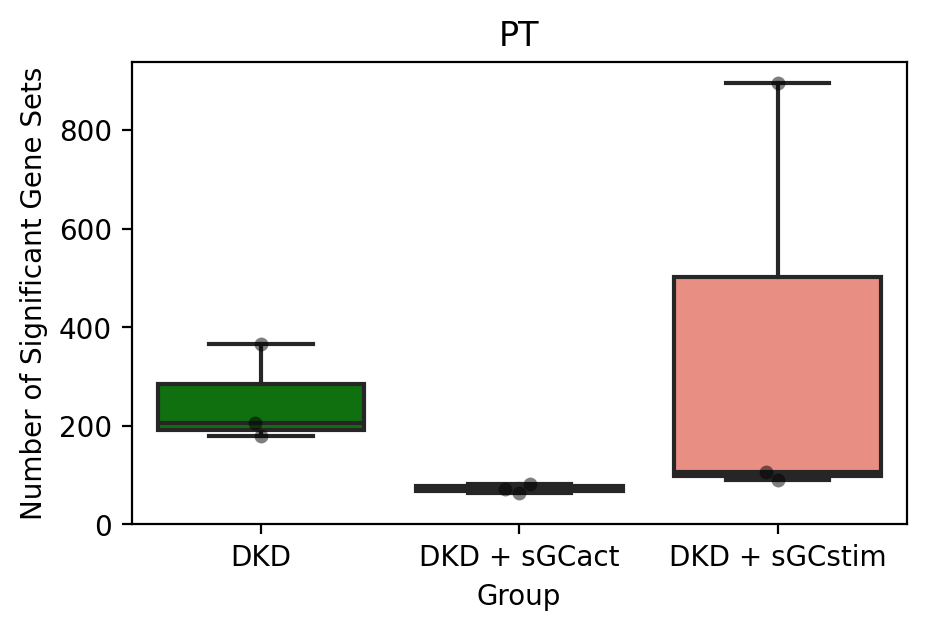

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

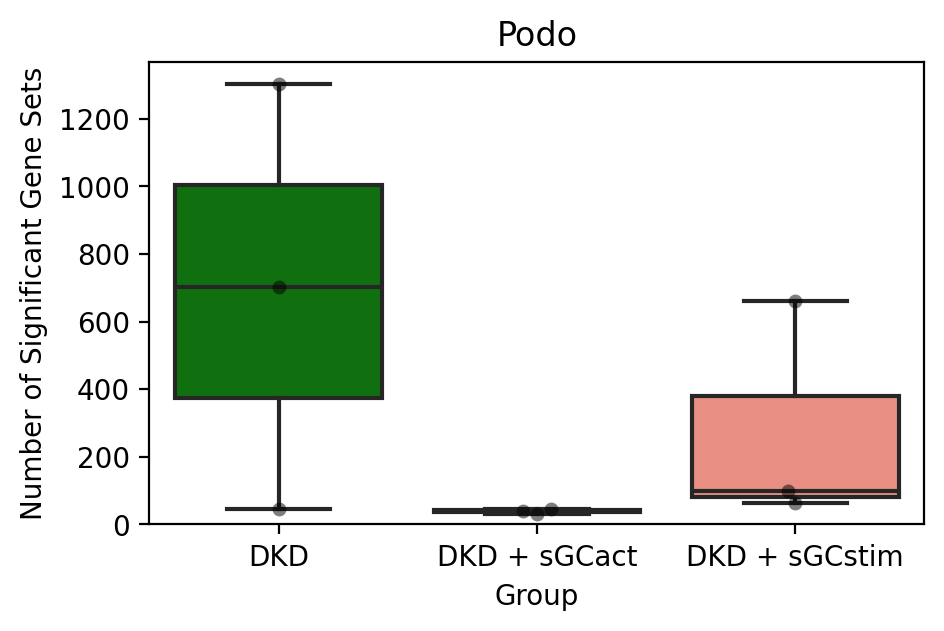

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

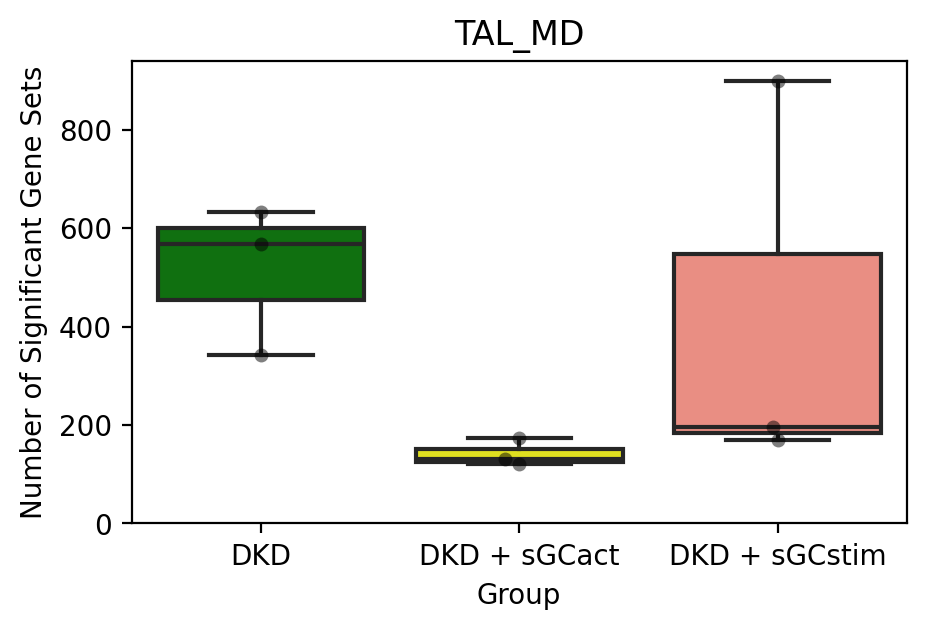

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

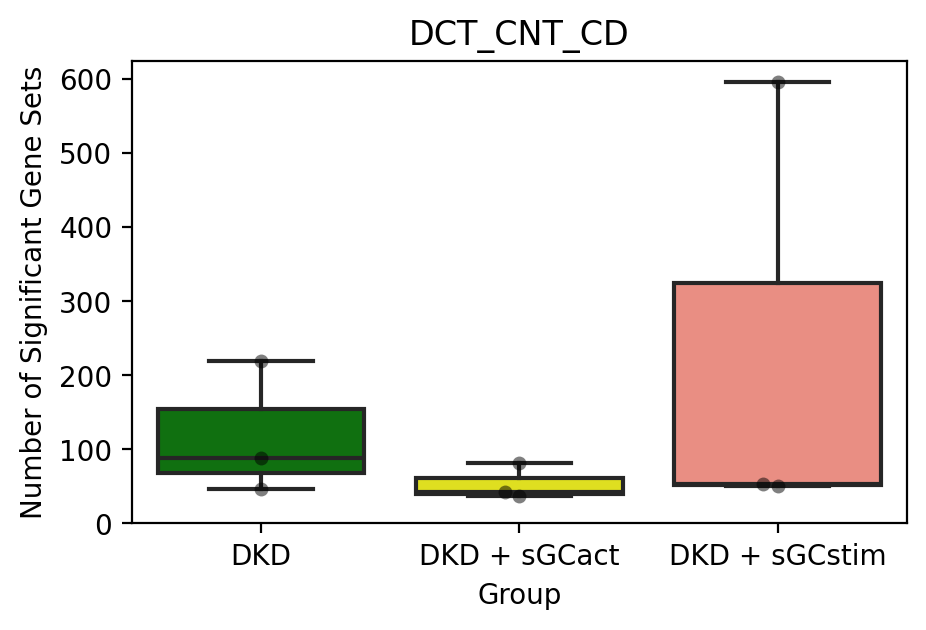

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

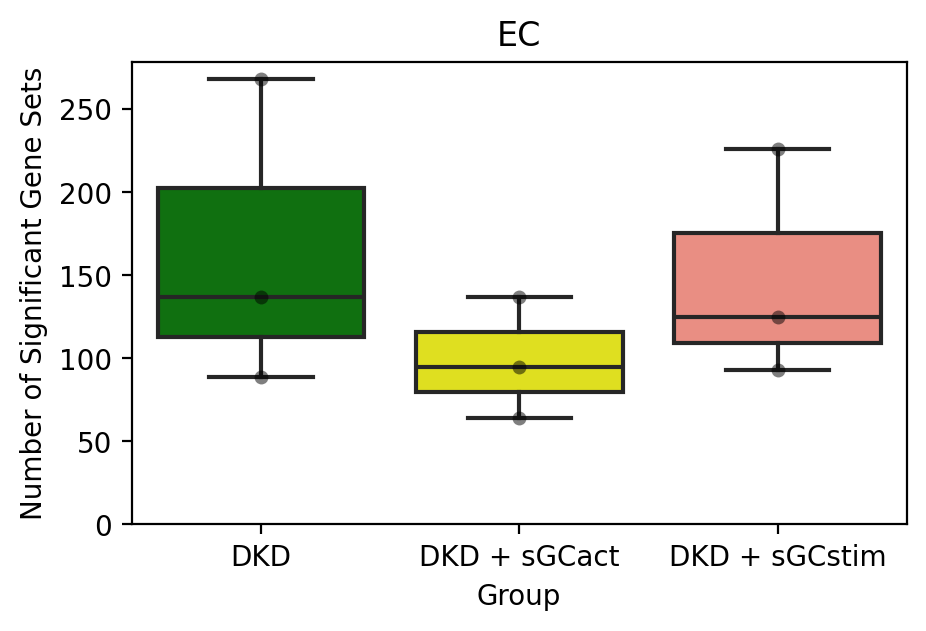

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

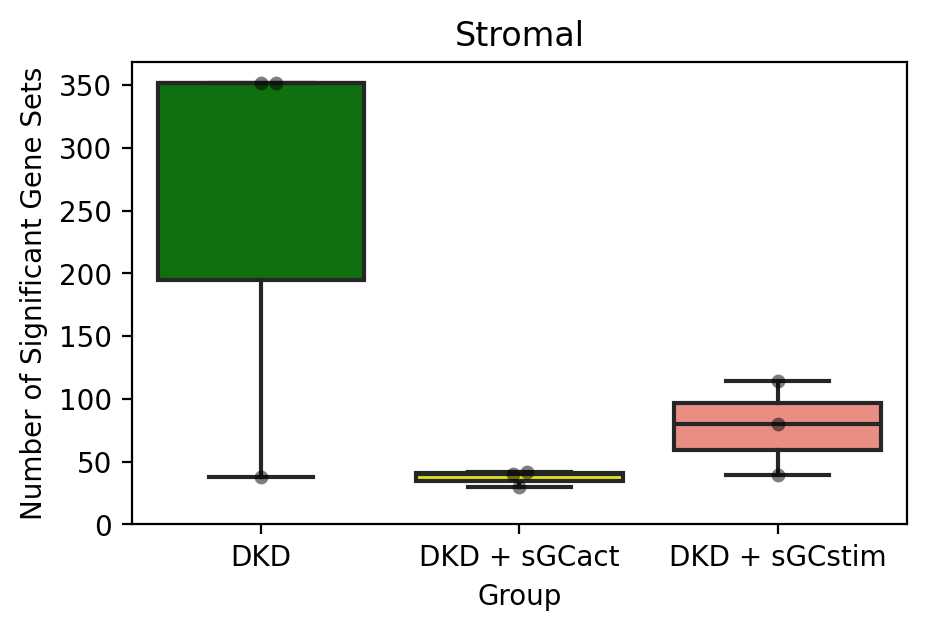

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

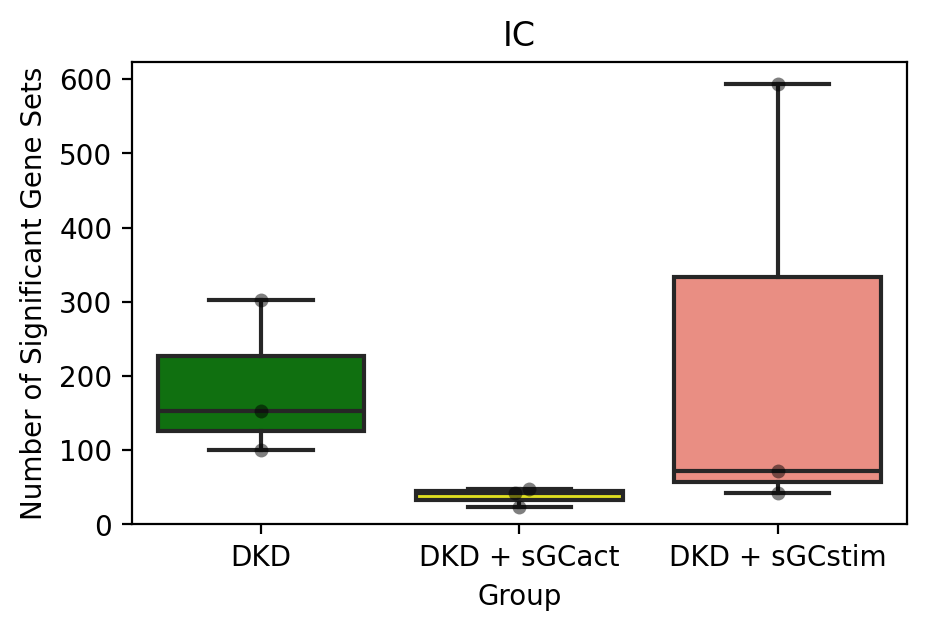

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

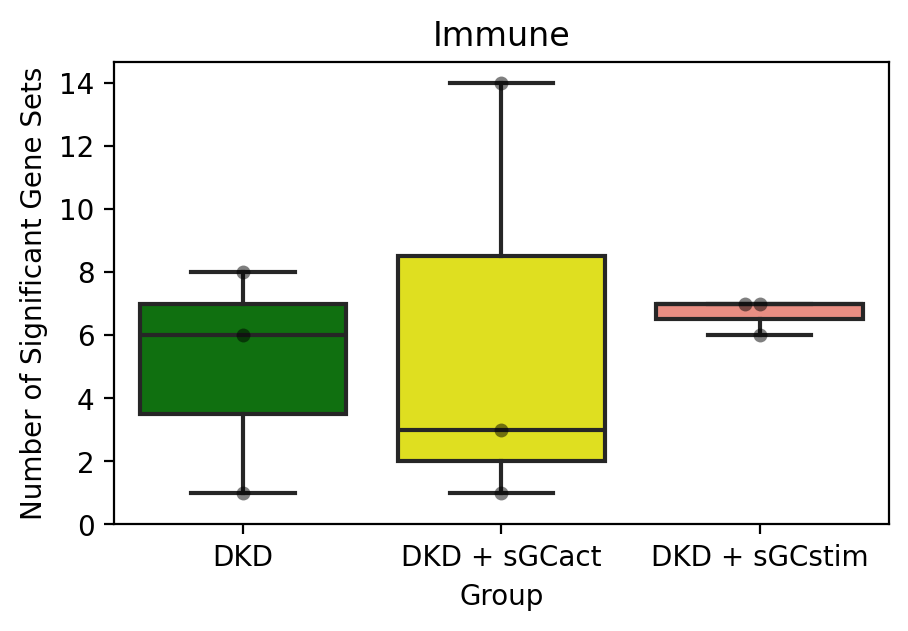

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

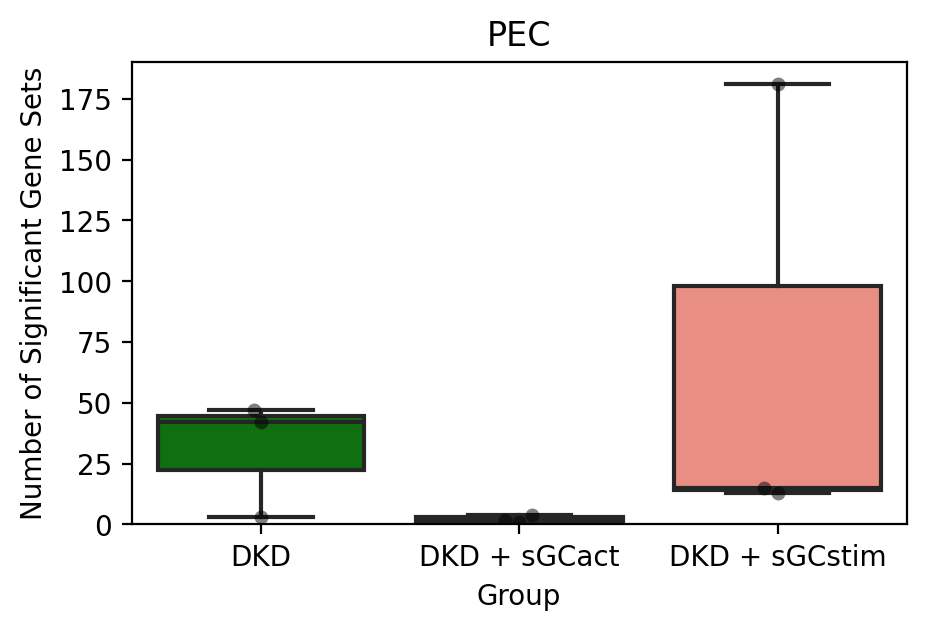

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

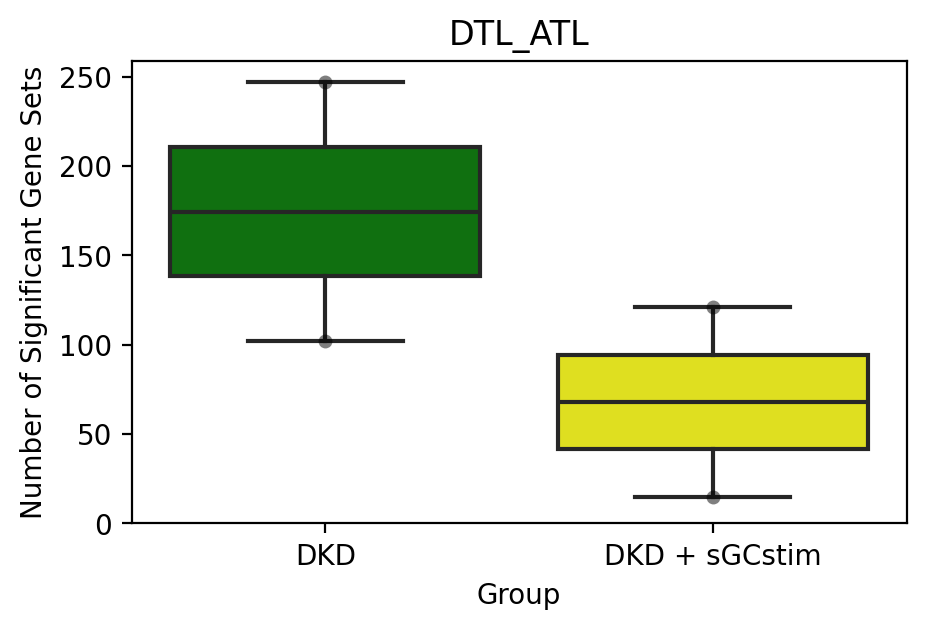

In [129]:
# Sample groups
group1 = metadata[(metadata["treated"] == "Control_diseased") & (metadata["proj"] == "r_ZSF")].orig_ident.unique().tolist()

group2 = metadata[(metadata["treated"] == "sGCact") & (metadata["proj"] == "r_ZSF")].orig_ident.unique().tolist()

group3 = metadata[(metadata["treated"] == "sGCstim") & (metadata["proj"] == "r_ZSF")].orig_ident.unique().tolist()

color_list = ['green', 'yellow', 'salmon']

groups = {'DKD': group1, 'DKD + sGCact': group2, 'DKD + sGCstim': group3}

for cell_type_of_interest in cell_types:
    p_value_threshold = 0.01

    # Prepare DataFrame to hold counts
    counts_df = pd.DataFrame(columns=['Group', 'Count'])

    # Loop through each group and each sample within the group
    for group_name, samples in groups.items():
        for sample in samples:
            # Filter for cell type of interest and significant p-values
            sample_features = combined_pval.loc[sample]
            significant_features = sample_features[sample_features < p_value_threshold]
            top_gene_sets = significant_features.index

            # Count gene sets for the specific cell type
            count = pd.Series(top_gene_sets).apply(lambda x: x.startswith(cell_type_of_interest)).sum()

            # Append count to the DataFrame only if count is greater than zero
            if count > 0:
                new_row = pd.DataFrame({'Group': [group_name], 'Count': [count]})
                counts_df = pd.concat([counts_df, new_row], ignore_index=True)

    # Plotting the counts using box plot
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=counts_df, x='Group', y='Count', palette=color_list)
    sns.swarmplot(data=counts_df, x='Group', y='Count', color='black', alpha=0.5)  # Add swarmplot for individual points
    plt.title(cell_type_of_interest)
    plt.ylabel('Number of Significant Gene Sets')
    plt.ylim(0)
    plt.xlabel('Group')
    plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

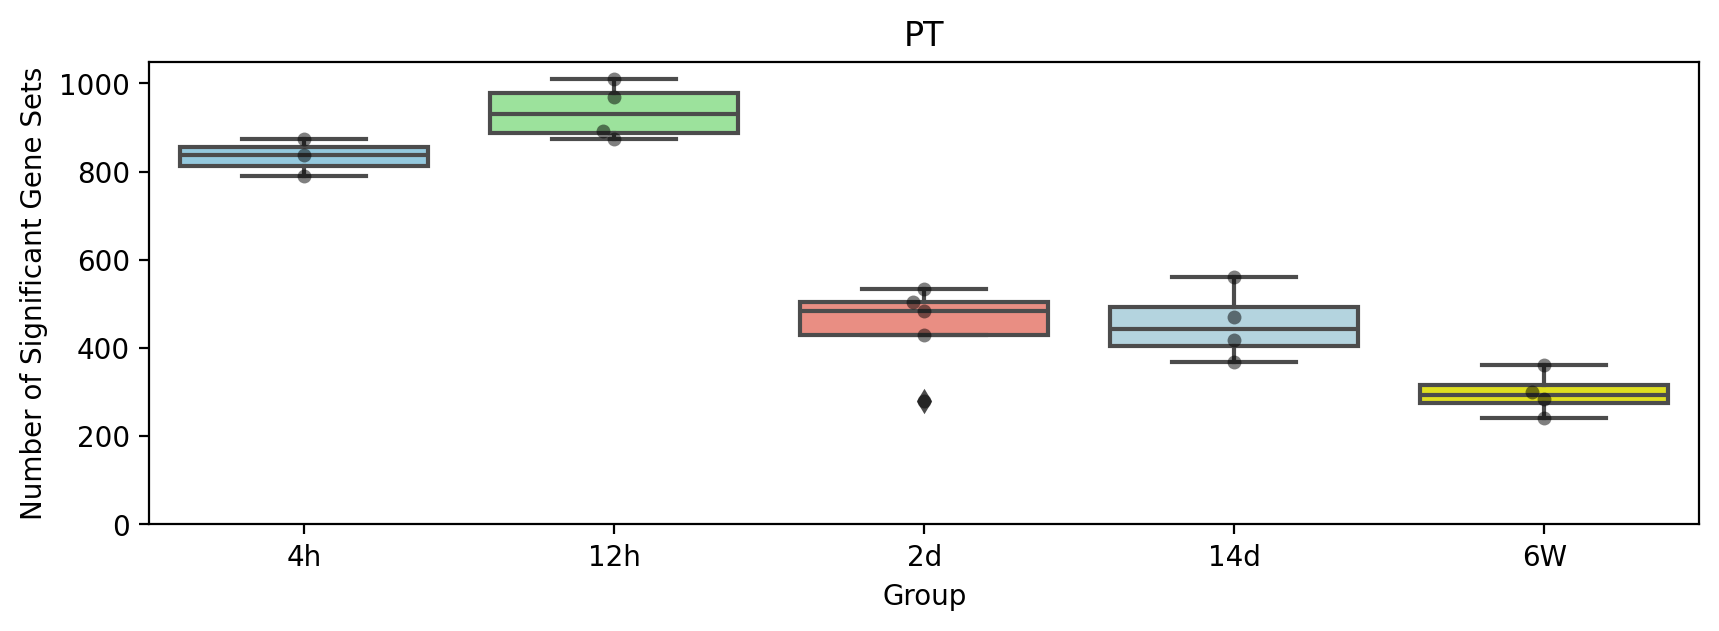

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

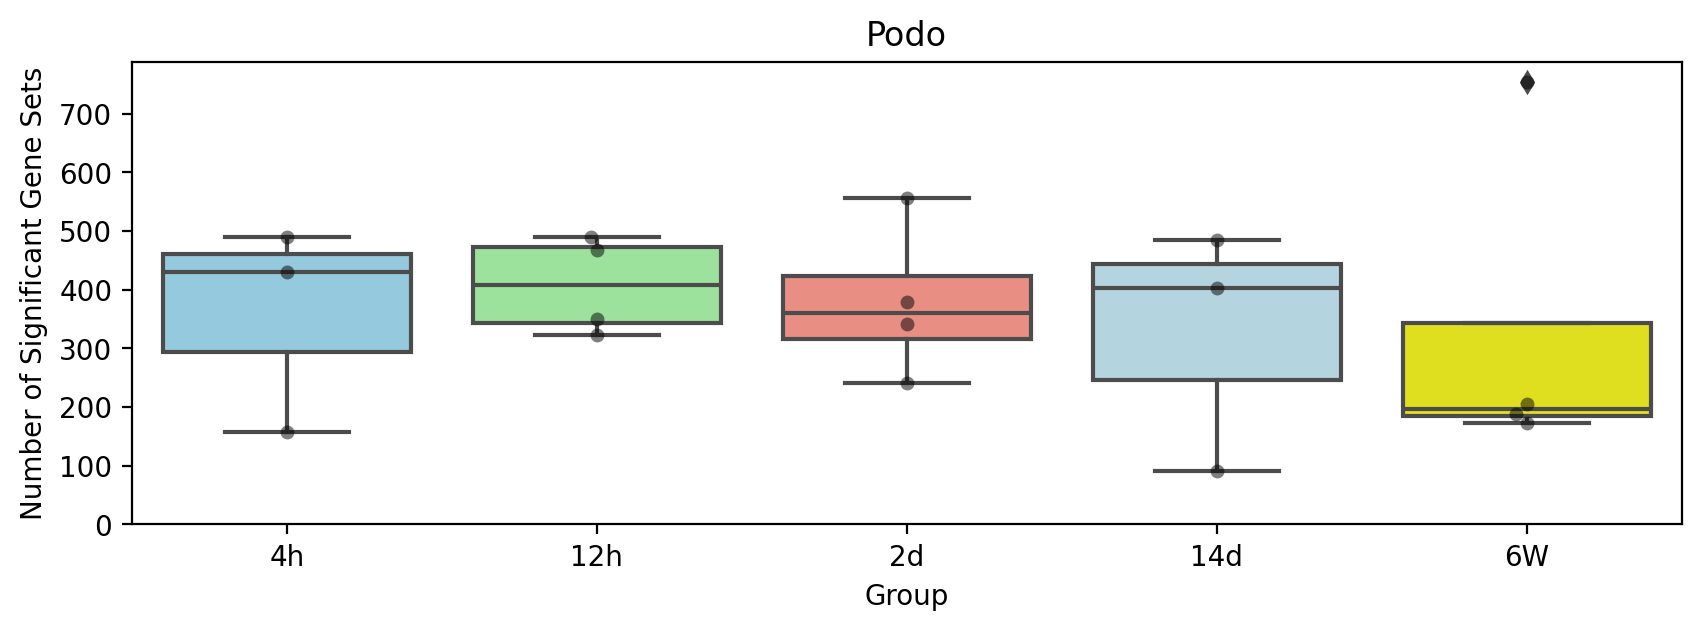

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

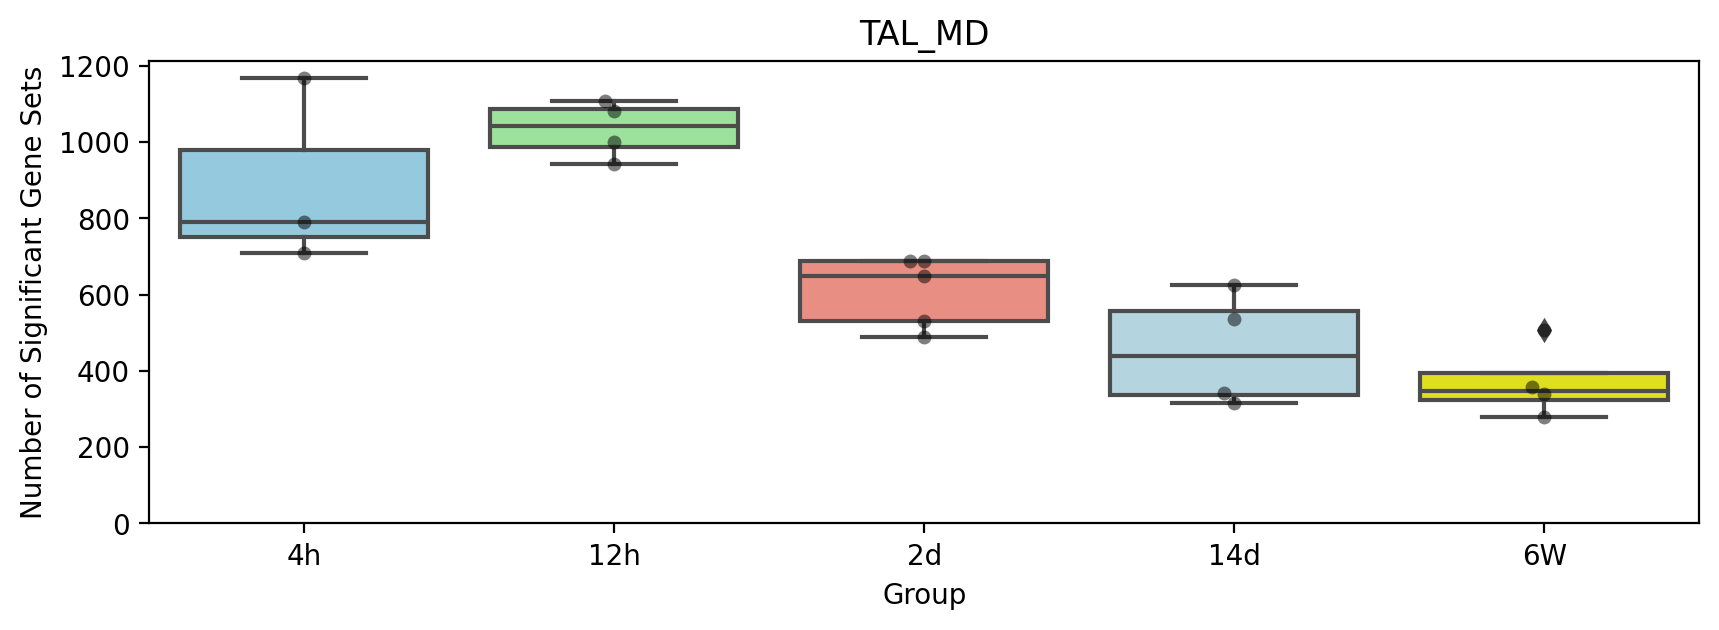

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

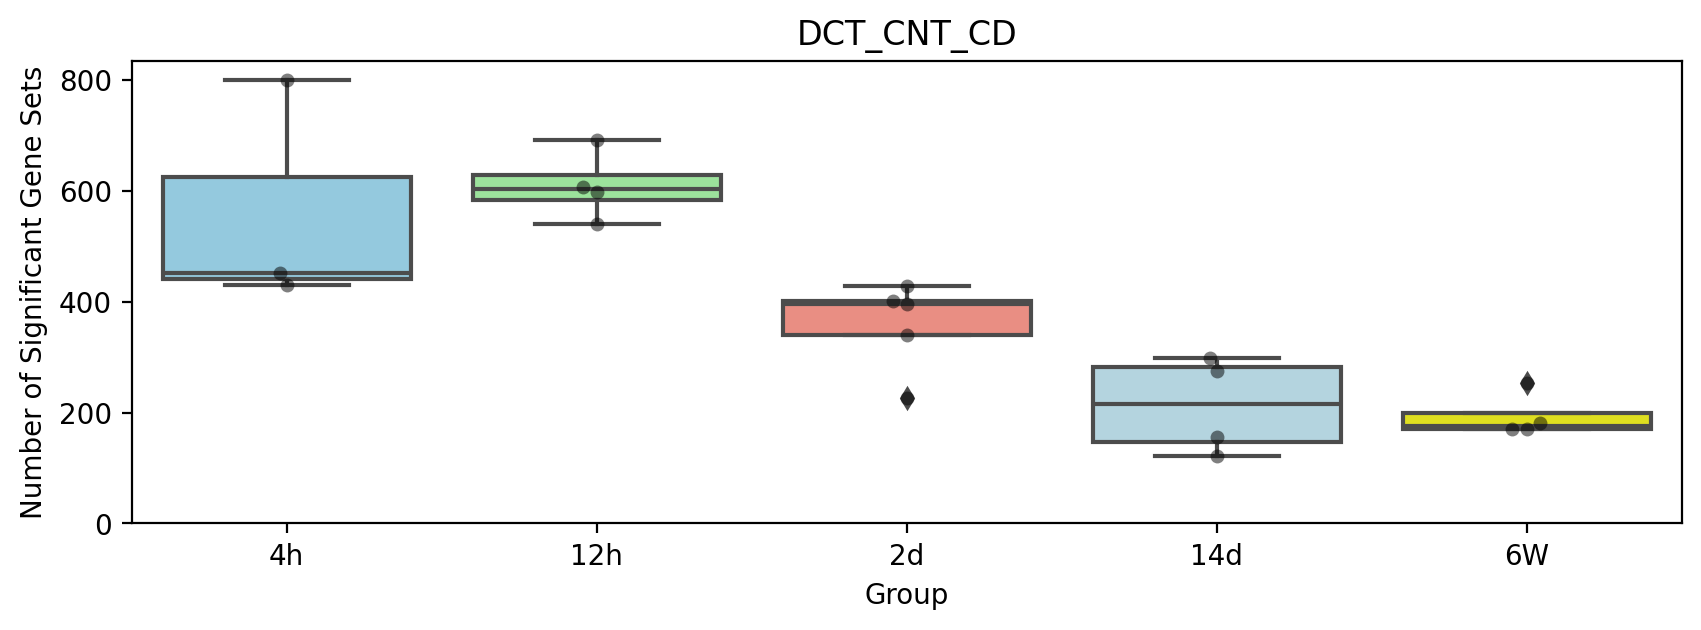

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

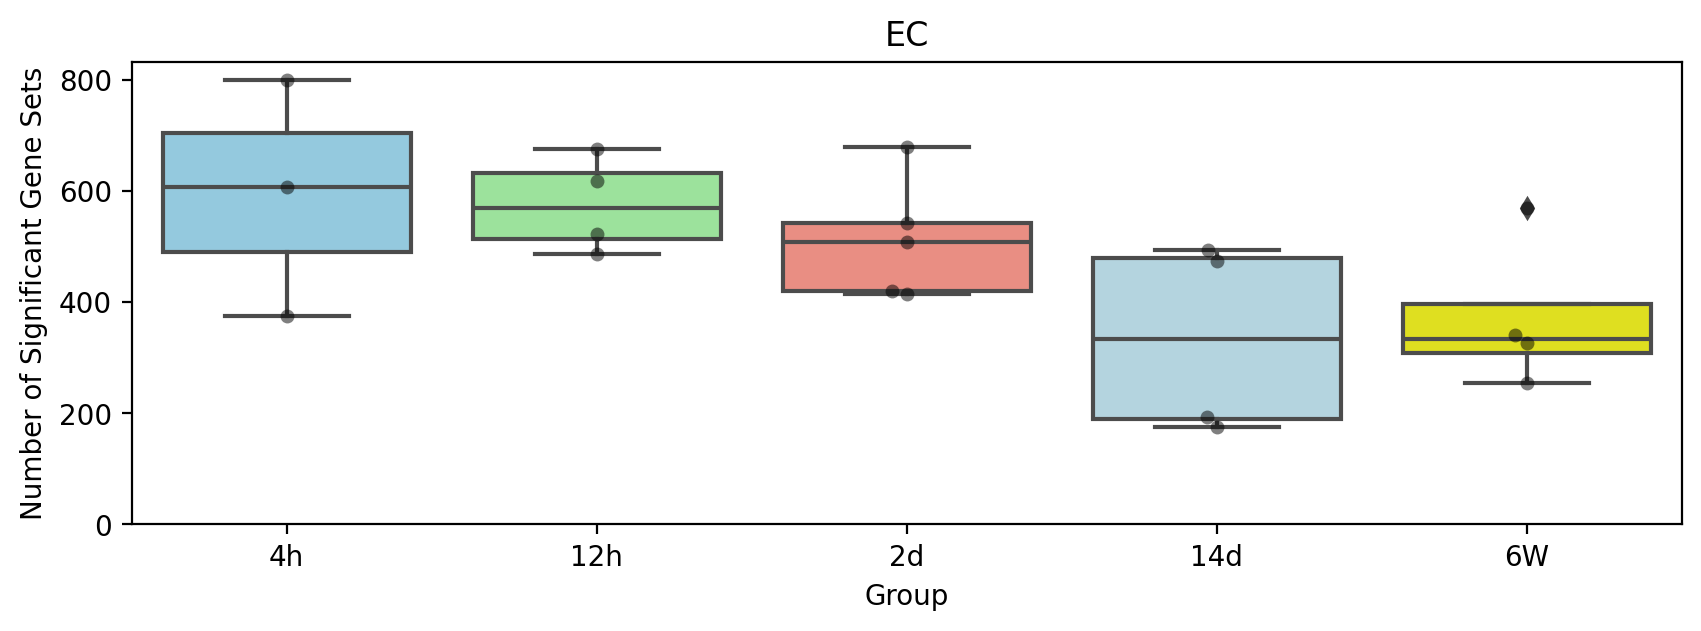

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

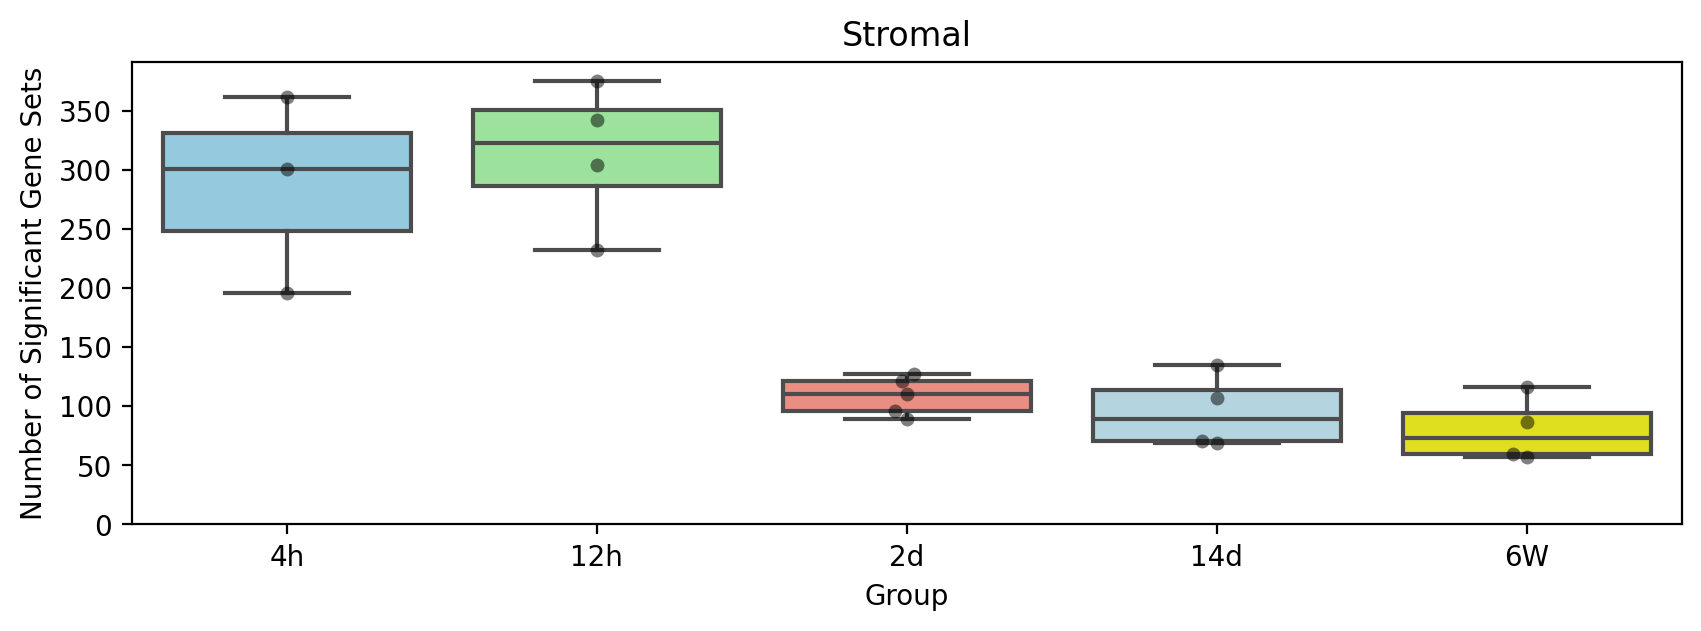

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

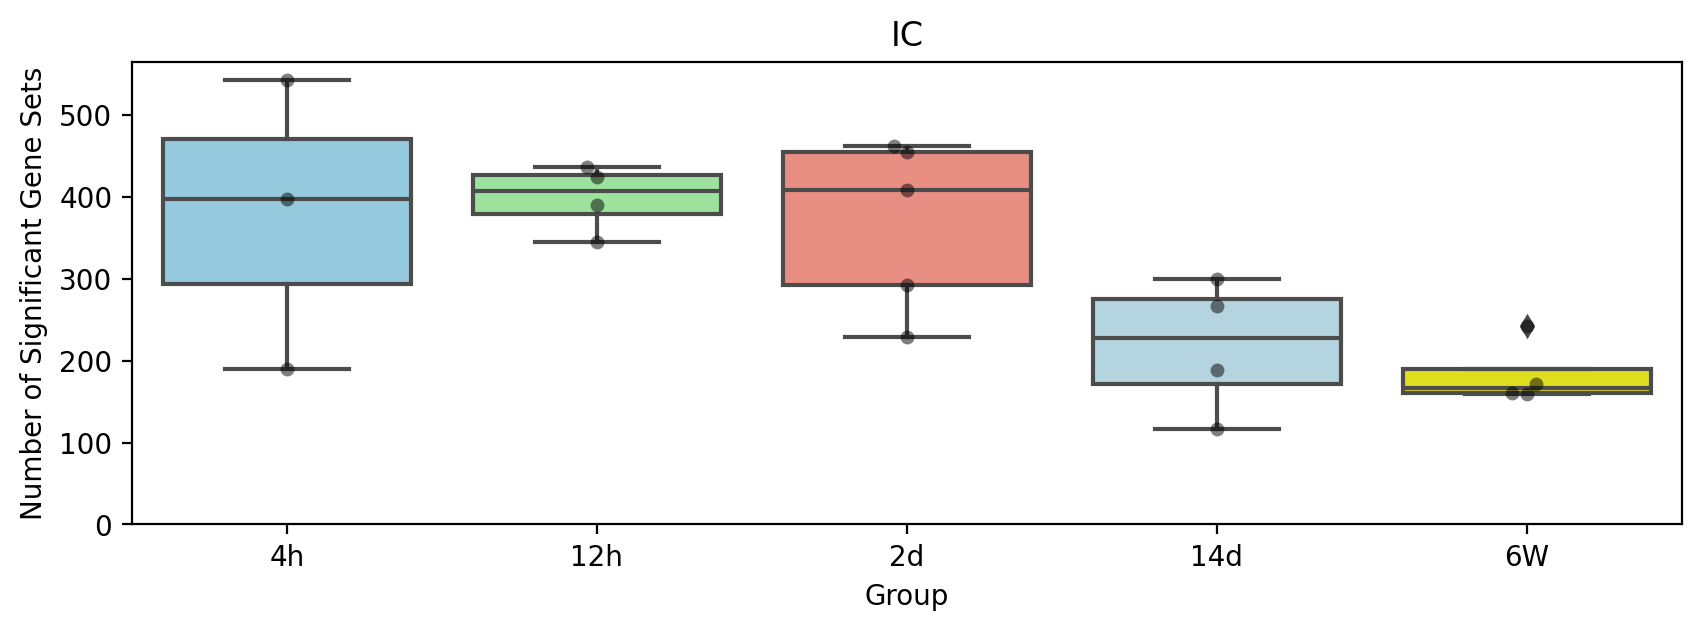

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

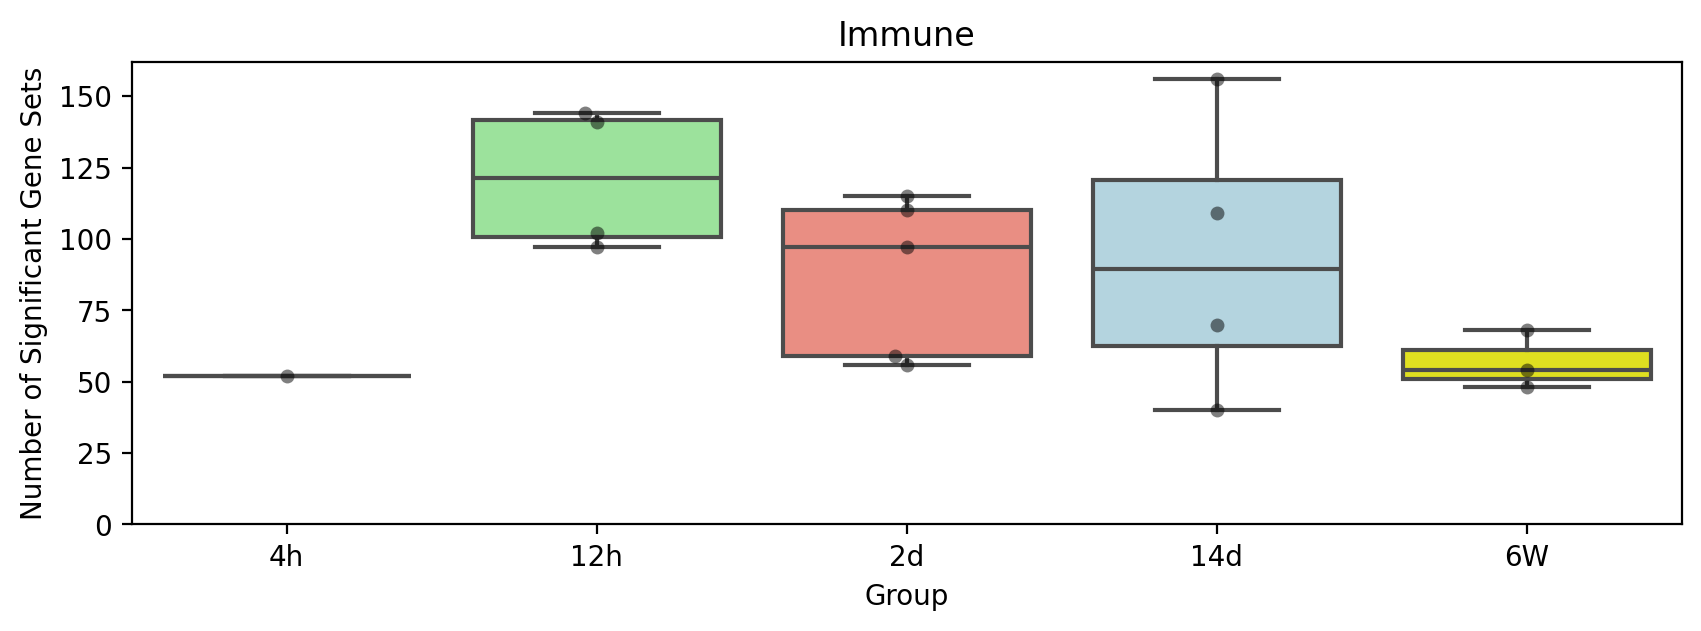

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

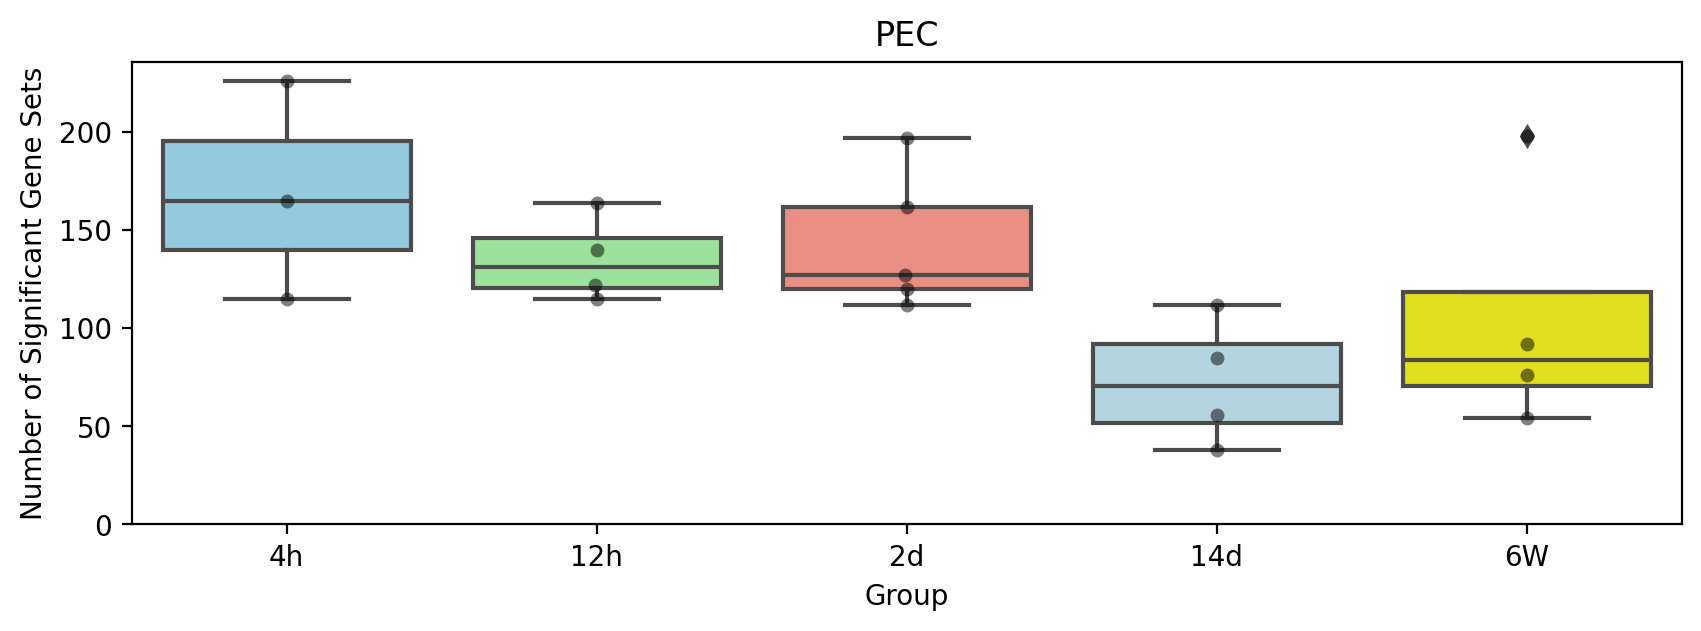

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

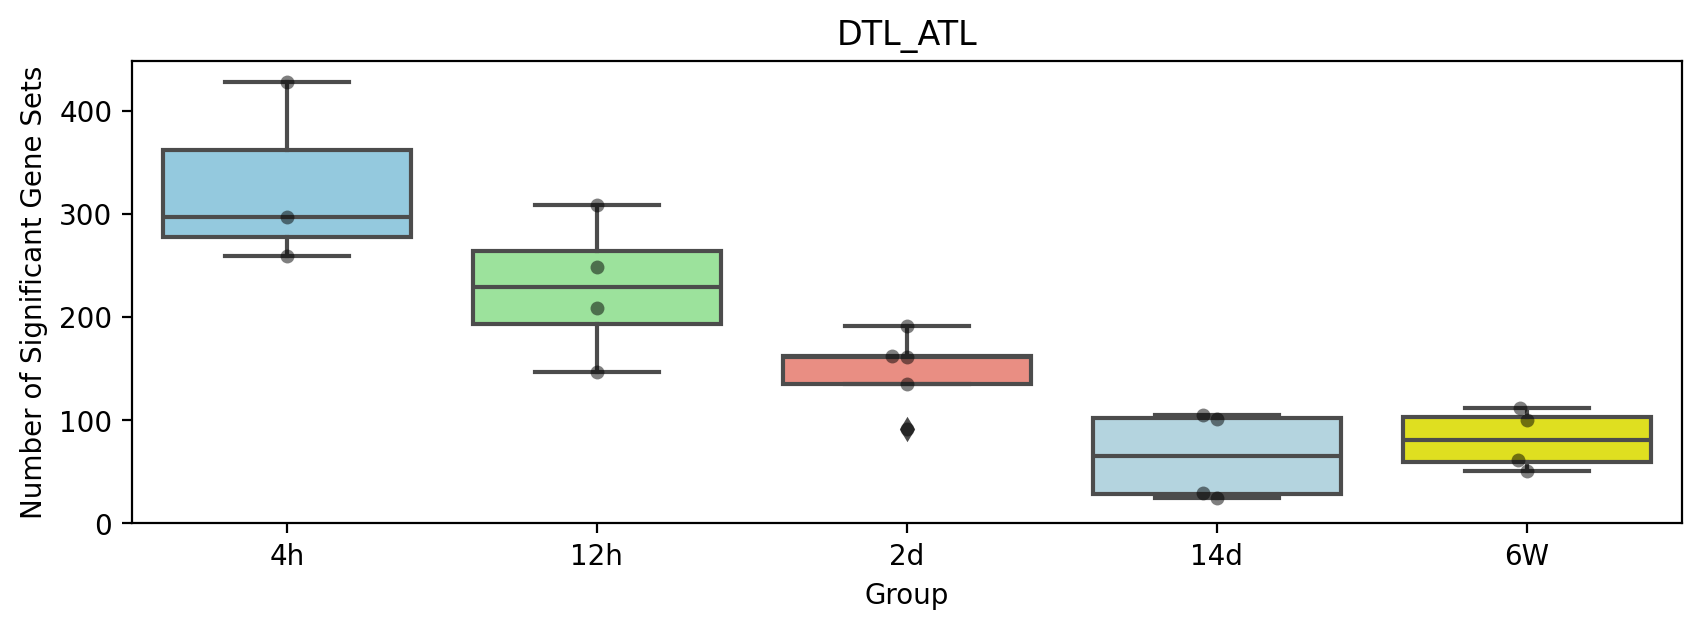

In [119]:
# Sample groups
group1 = ["IRI4h1", "IRI4h2", "IRI4h3"]

group2 = ["IRI12h1b1",
"IRI12h1b2",
"IRI12h2",
"IRI12h3"]

group3 = ["IRI2d1b1",
"IRI2d1b2",
"IRI2d2b1",
"IRI2d2b2",
"IRI2d3"]

group4 = ["IRI14d1b1",
"IRI14d1b2",
"IRI14d2",
"IRI14d3"]

group5 = ["IRI6w1b1", "IRI6w1b2", "IRI6w2", "IRI6w3"]

color_list = ['skyblue', 'lightgreen', 'salmon', "lightblue", "yellow"]

groups = {'4h': group1, '12h': group2, '2d': group3, '14d': group4, '6W': group5}

for cell_type_of_interest in cell_types:
    p_value_threshold = 0.01

    # Prepare DataFrame to hold counts
    counts_df = pd.DataFrame(columns=['Group', 'Count'])

    # Loop through each group and each sample within the group
    for group_name, samples in groups.items():
        for sample in samples:
            # Filter for cell type of interest and significant p-values
            sample_features = combined_pval.loc[sample]
            significant_features = sample_features[sample_features < p_value_threshold]
            top_gene_sets = significant_features.index

            # Count gene sets for the specific cell type
            count = pd.Series(top_gene_sets).apply(lambda x: x.startswith(cell_type_of_interest)).sum()

            # Append count to the DataFrame only if count is greater than zero
            if count > 0:
                new_row = pd.DataFrame({'Group': [group_name], 'Count': [count]})
                counts_df = pd.concat([counts_df, new_row], ignore_index=True)

    # Plotting the counts using box plot
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=counts_df, x='Group', y='Count', palette=color_list)
    sns.swarmplot(data=counts_df, x='Group', y='Count', color='black', alpha=0.5)  # Add swarmplot for individual points
    plt.title(cell_type_of_interest)
    plt.ylabel('Number of Significant Gene Sets')
    plt.ylim(0)
    plt.xlabel('Group')
    plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

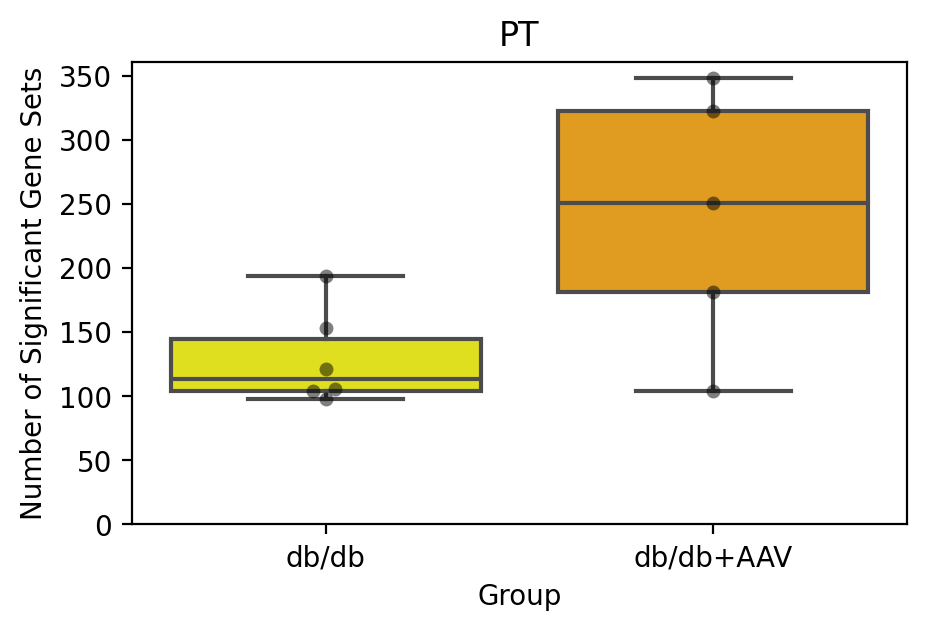

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

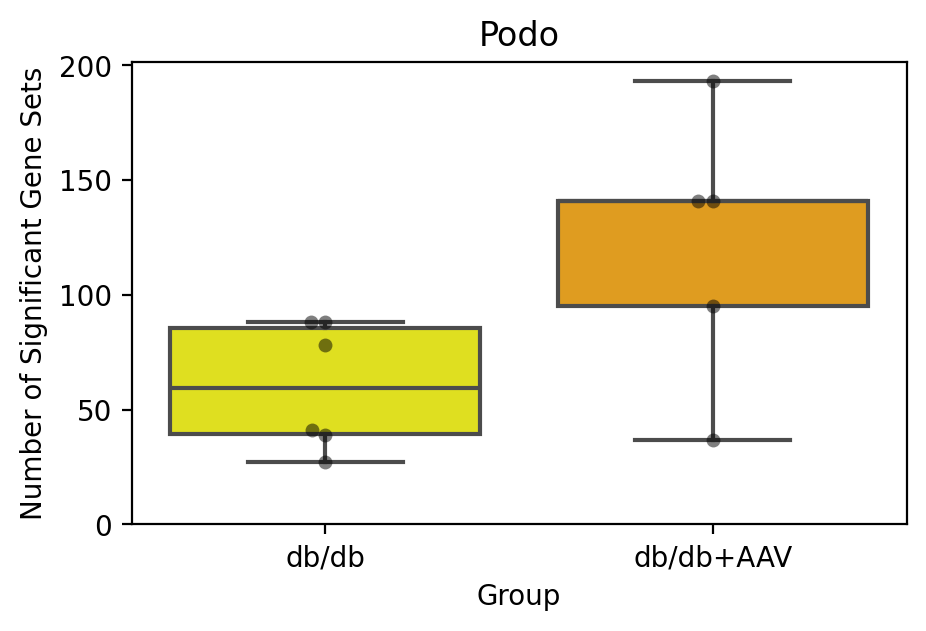

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

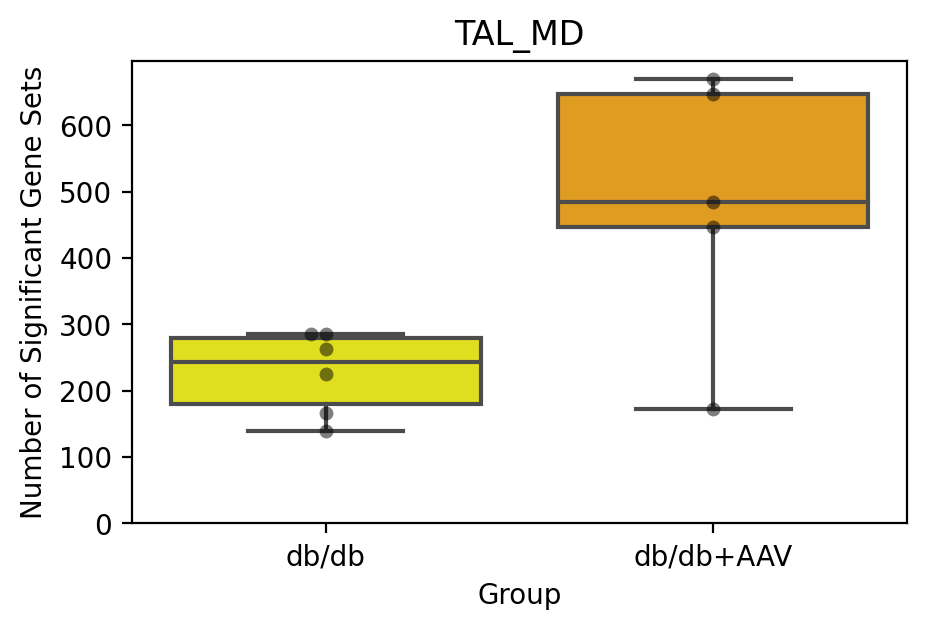

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

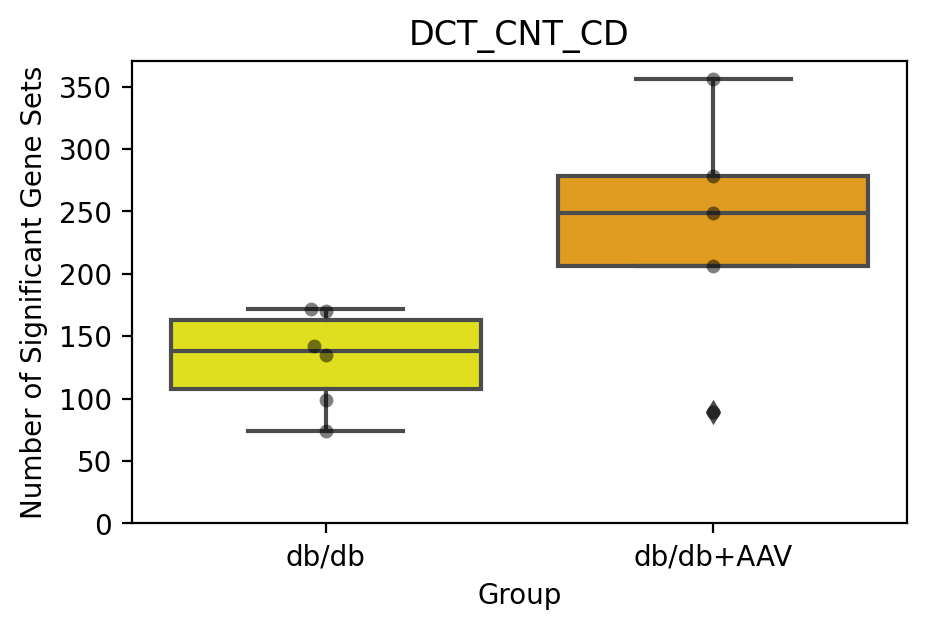

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

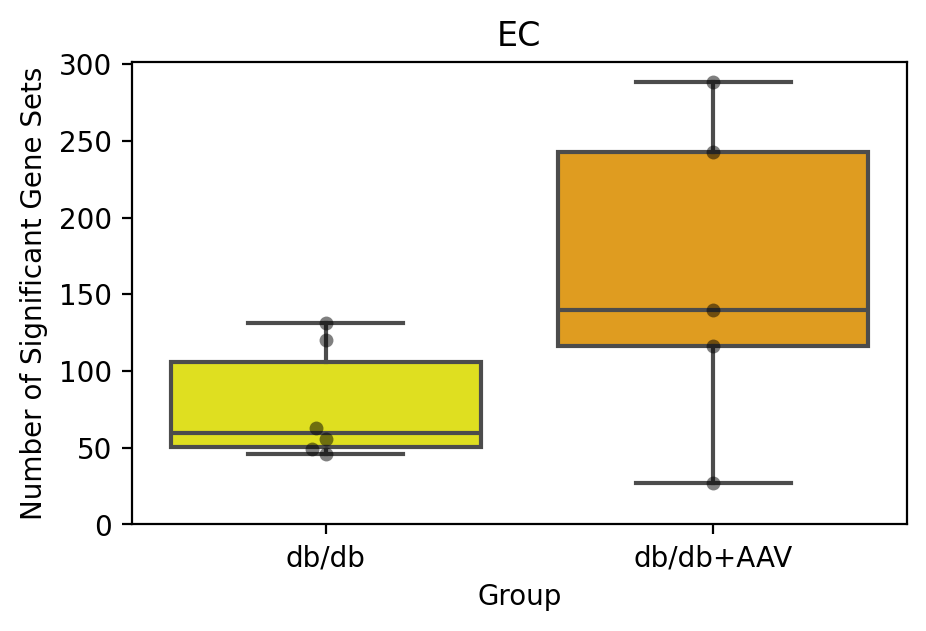

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

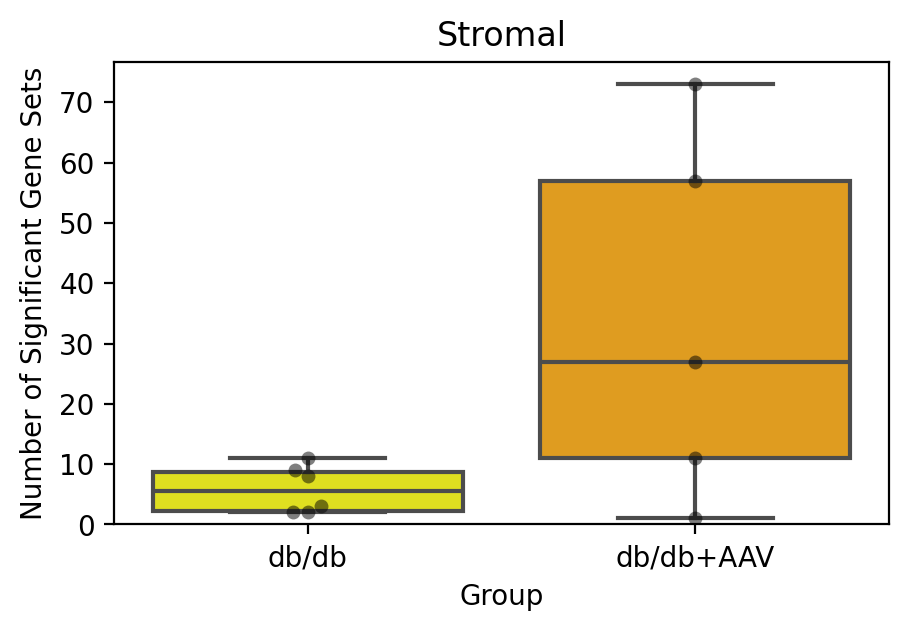

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

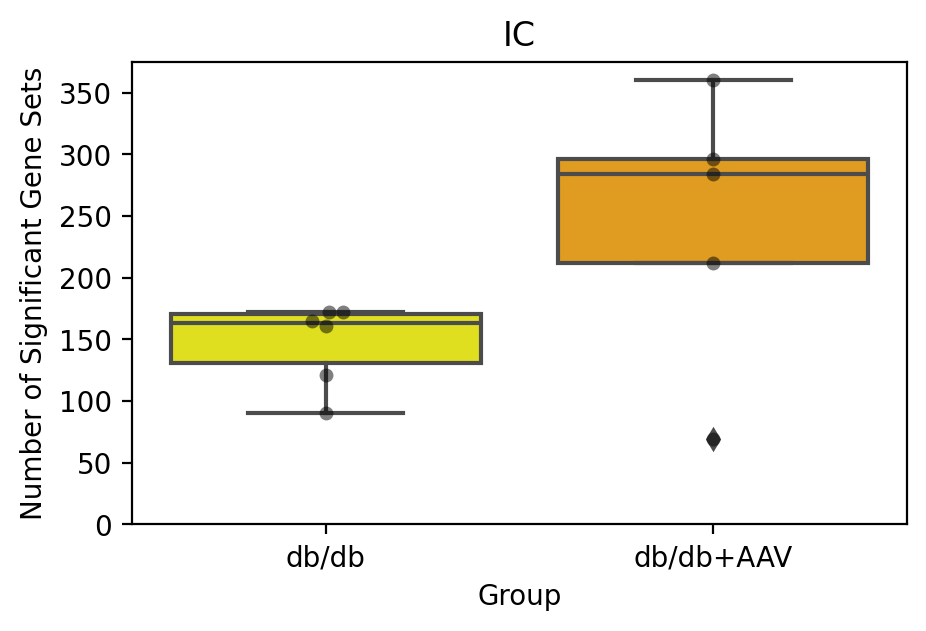

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

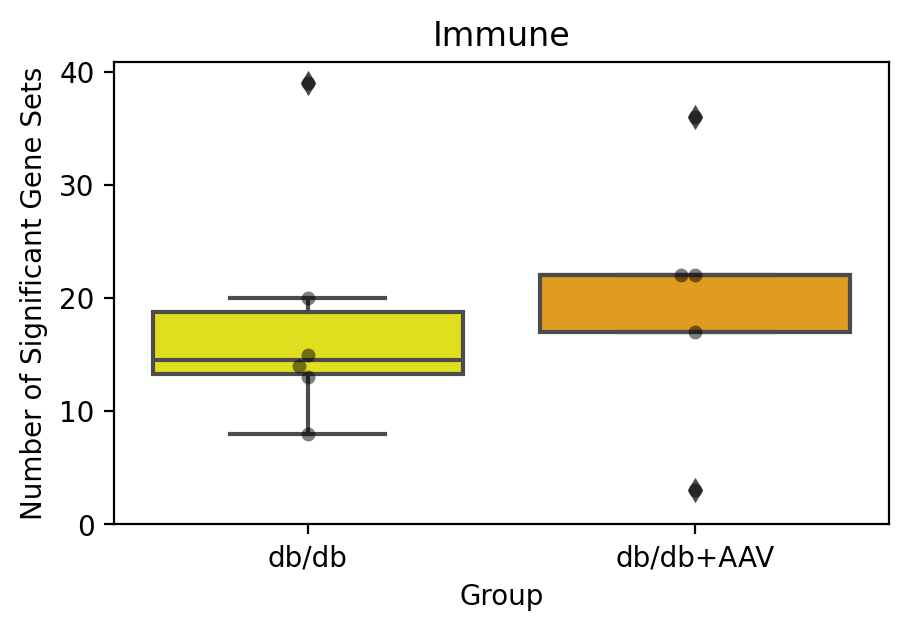

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

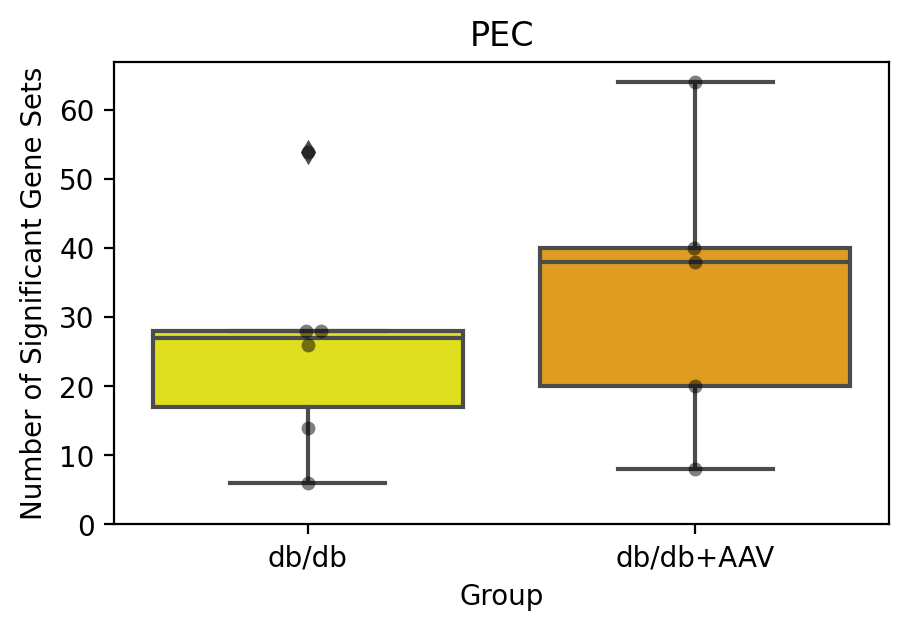

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

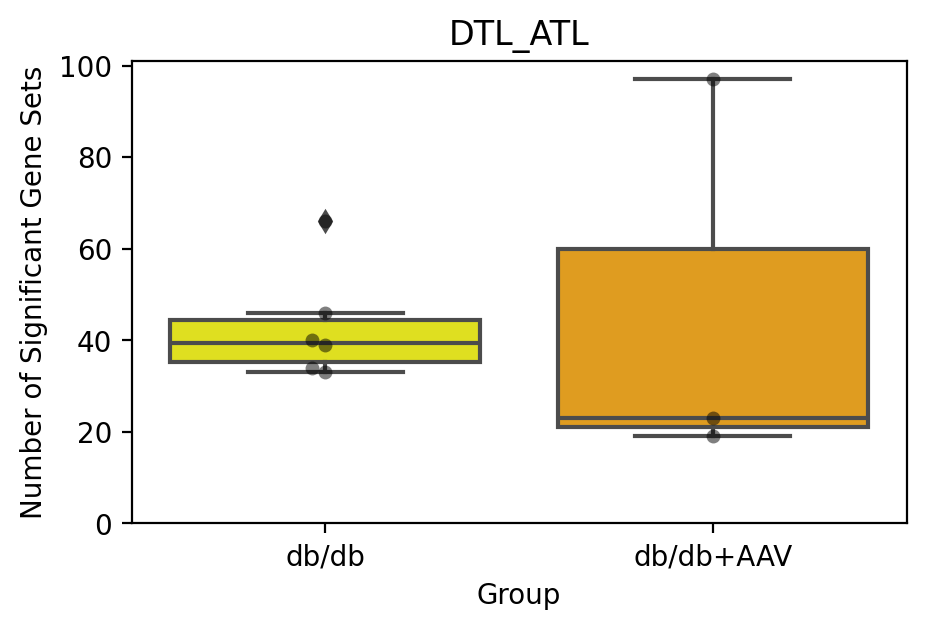

In [124]:
# Sample groups
group1 = ["N3024", "A3026", "A3029", "B3025", "B3027", "C3028"]

group2 = ["A3038", "B3039", "B3035", "J3036", "K3037"]




color_list = ['yellow', 'orange']

groups = {'db/db': group1, 'db/db+AAV': group2}

for cell_type_of_interest in cell_types:
    p_value_threshold = 0.01

    # Prepare DataFrame to hold counts
    counts_df = pd.DataFrame(columns=['Group', 'Count'])

    # Loop through each group and each sample within the group
    for group_name, samples in groups.items():
        for sample in samples:
            # Filter for cell type of interest and significant p-values
            sample_features = combined_pval.loc[sample]
            significant_features = sample_features[sample_features < p_value_threshold]
            top_gene_sets = significant_features.index

            # Count gene sets for the specific cell type
            count = pd.Series(top_gene_sets).apply(lambda x: x.startswith(cell_type_of_interest)).sum()

            # Append count to the DataFrame only if count is greater than zero
            if count > 0:
                new_row = pd.DataFrame({'Group': [group_name], 'Count': [count]})
                counts_df = pd.concat([counts_df, new_row], ignore_index=True)

    # Plotting the counts using box plot
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=counts_df, x='Group', y='Count', palette=color_list)
    sns.swarmplot(data=counts_df, x='Group', y='Count', color='black', alpha=0.5)  # Add swarmplot for individual points
    plt.title(cell_type_of_interest)
    plt.ylabel('Number of Significant Gene Sets')
    plt.ylim(0)
    plt.xlabel('Group')
    plt.show()